<h1>Trabalho de Conclusão de Curso - IDESP</h1>
<h2>Entrega - 2</h2>
<p><b>Instituição:</b> FIA - Fundação Instituto de Administração</p>
<p><b>Conteúdo:</b> <b>Entrega 02</b> - Business Case e Técnicas de Estatística Clássica</p>
<p><b>Turma</b>: 12 </p>
<p><b>Ano</b>: 2020</p>
<p><b>Autor:</b> João Paulo Ribeiro dos Santos</p>
<p><b>Localização Projeto: </b> <a href = 'https://github.com/Joao-TheCosmosIsInfinite/FIA_Projeto_Machine_Learning' target = "_blank">Git Hub</a></p>

<h2>Indice</h2> 

[1. Importações das bibliotecas](#head3_1)<br>
[2. Importações dos Datasets](#head3_2)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1. Informações do IDESP](#head4_21)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2. Informações das Escolas](#head4_22)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3. Dependencias das Escolas](#head4_23)<br>
[3. Dicionario das colunas dos dataframes](#head3_3)<br>
[4. Informação dos dataframes](#head3_4)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.1. Dimensão dos dataframes](#head4_41)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[4.2. Classificação das variáveis](#head4_42)<br>
[5. Verificar valores nulos](#head3_5)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.1. Identificar e tratar valores nulos 'df_school_geolocation'](#head4_51)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.2. Identificar e tratar valores nulos 'df_idesp_2019'](#head4_52)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[5.3. Identificar e tratar valores nulos 'df_school_dependecy'](#head4_53)<br>
[6. Verificando e tratando outliers](#head3_6)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[6.1. Identificar e tratar outliers 'df_school_geolocation'](#head4_61)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[6.2. Identificar e tratar outliers 'df_idesp_2019'](#head4_62)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[6.3. Identificar e tratar outliers 'df_school_dependecy'](#head4_63)<br>
[7. Distribuição de frequencia dos dados qualitativos](#head3_7)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.1. Distribuição no 'df_school_geolocation'](#head4_71)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.2. Distribuição no 'df_idesp_2019'](#head4_72)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[7.3. Distribuição no 'df_school_dependecy'](#head4_73)<br>
[8. Criando a ABT (Analytical Base Table)](#head3_8)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[8.1. Realizando o join entre 'df_idesp_2019' e 'df_school_geolocation'](#head4_81)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[8.2. Realizando o join entre 'df_jn_idesp_geolocation' e 'df_school_dependecy_treat'](#head4_82)<br>
[9. Realizando o tratamento com as variaveis categoricas](#head3_9)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[9.1. Analisando os dados dos parametros selecionados](#head4_91)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[9.2. Aplicando o One-Hot-Encondig](#head4_92)<br>
[10. Seleção de Hiperparâmetros](#head3_10)<br>
[11. Criando as bases de treino e teste](#head3_11)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[11.1. Definindo as variaveis](#head4_111)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[11.2. Separando as bases de treino e teste](#head4_112)<br>
[12. Submetendo o problema aos modelos](#head3_12)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[12.1. Modelo de Regressão Linear](#head4_121)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.1.1. Analisando as métricas](#head5_1211)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.1.2. Definindo os hiperparâmetros](#head5_1212)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[12.2. Modelo Árvore de Decisão com Regressão](#head4_122)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.2.1. Analisando as métricas](#head5_1221)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[12.2.2. Exibindo a Árvore](#head5_1222)<br>
[13. Comparando as estatísticas dos modelos](#head3_13)<br>



<a id ='head3_1'></a>
<h3>1. Importações das bibliotecas</h3>

In [1]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import graphviz
import pydotplus

from collections import defaultdict
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz  
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn import tree
from sklearn.externals.six import StringIO  
from IPython.display import Image  

%matplotlib inline

/home/joao/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [3]:
## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_rows', 200)

## Definir numero maximo de linhas para visualizar
pd.set_option('display.max_columns', 50)

<a id ='head3_2'></a>
<h3>2. Importações dos Datasets</h3>

<a id ='head4_21'></a>
<h4>2.1. Informações do IDESP</h4>

In [4]:
## IDESP  no ano de 2019
df_idesp_2019 = \
                pd.read_csv('data/IDESP/' \
                                'IDESP_ESCOLA_2019.csv')

<a id ='head4_22'></a>
<h4>2.2. Informações das Escolas</h4>

In [5]:
## Dados Geográficos das Escolas
df_school_geolocation = \
                        pd.read_csv('data/DADOS_ESCOLA/11_Escolas_Coordenadas.csv',
                                    sep = ';',
                                    decimal = ',',
                                    encoding  = 'ISO-8859-1')

<a id ='head4_23'></a>
<h4>2.3. Dependencias das Escolas</h4>

In [6]:
## Dados da infraestrutura das escolas
df_school_dependecy = \
                        pd.read_csv('data/INSTALACAO_FISICA_ESCOLA/06_Escolas_Dependencias.csv',
                                    sep = ';')                                    

<a id = 'head3_3'></a>
<h3>3. Dicionario das colunas dos dataframes</h3>

| Object | Field| Description |
| :- | :- | :- |
| <b>df_school_geolocation</b> | NOMEDEP | Qualitativa Nominal |
| | DE | Qualitativa Nominal |
| | MUN | Qualitativa Nominal |
| | DISTR | Qualitativa Nominal |
| | COD_ESC | Qualitativa Nominal |
| | NOMESC | Qualitativa Nominal |
| | SITUACAO | Qualitativa Nominal |
| | TIPOESC | Qualitativa Nominal |
| | ENDESC | Qualitativa Nominal |
| | NUMESC | Quantitativa Discreta |
| | COMPLEND | Qualitativa Nominal |
| | CEP | Qualitativa Nominal |
| | BAIESC | Qualitativa Nominal |
| | ZONA | Qualitativa Nominal |
| | DS_LONGITUDE | Quantitativa Continua |
| | DS_LATITUDE | Quantitativa Continua |
| | CODVINC | Quantitativa Discreta |

<a id = 'head3_4'></a>
<h3>4. Informação dos dataframes</h3>

<a id = 'head4_41'></a>
<h4>4.1. Dimensão dos dataframes</h4>

In [7]:
## Dimensão do dataframe
print('Dimensão do dataframe "df_school_dependecy":', \
                                                df_school_dependecy.shape)

print('Dimensão do dataframe "df_school_geolocation":', \
                                                df_school_geolocation.shape)

print('Dimensão do dataframe "df_idesp_2019":', \
                                                df_idesp_2019.shape)


Dimensão do dataframe "df_school_dependecy": (5608, 172)
Dimensão do dataframe "df_school_geolocation": (5736, 17)
Dimensão do dataframe "df_idesp_2019": (5047, 10)


In [8]:
## Schema do dataframe
df_school_geolocation.dtypes

NOMEDEP          object
DE               object
MUN              object
DISTR            object
COD_ESC           int64
NOMESC           object
SITUACAO         object
TIPOESC          object
ENDESC           object
NUMESC           object
COMPLEND         object
CEP               int64
BAIESC           object
ZONA             object
DS_LONGITUDE    float64
DS_LATITUDE     float64
CODVINC         float64
dtype: object

In [9]:
## Schema do dataframe
df_idesp_2019.dtypes

ANO_LETIVO           int64
CODIGO_CIE           int64
CODIGO_INEP          int64
CodigoDiretoria      int64
NomeDiretoria       object
NomeEscola          object
NomeMunicipio       object
ANOS_INICIAIS      float64
ANOS_FINAIS        float64
ENSINO_MÉDIO       float64
dtype: object

In [10]:
## Schema do dataframe
df_school_dependecy.dtypes

NOMEDEP                         object
DE                              object
MUN                             object
DISTR                           object
CODESC                           int64
NOMESC                          object
TIPOESC                          int64
TIPOESC_DESC                    object
SITUACAO                        object
SALAS_AULA                       int64
SALAS_ED_INF                     int64
SALAS_ED_ESP                     int64
SALAS_ED_ART                     int64
SALA_RECURSO                     int64
TOT_SALAS_AULA                   int64
AUDITORIO                        int64
ANFITEATRO                       int64
TEATRO                           int64
CANTINA                          int64
COPA                             int64
COZINHA                          int64
REFEITORIO                       int64
DEPOSITO_ALIMENTOS               int64
DESPENSA                         int64
TOT_DESPENSA                     int64
SALA_LEITURA             

<a id = 'head4_42'></a>
<h4>4.2. Classificação das variáveis</h4>

| Object | Field| Variable Classification |
| :- | :- | :- |
| <b>df_school_geolocation</b> | NOMEDEP | Qualitativa Nominal |
| | DE | Qualitativa Nominal |
| | MUN | Qualitativa Nominal |
| | DISTR | Qualitativa Nominal |
| | COD_ESC | Qualitativa Nominal |
| | NOMESC | Qualitativa Nominal |
| | SITUACAO | Qualitativa Nominal |
| | TIPOESC | Qualitativa Nominal |
| | ENDESC | Qualitativa Nominal |
| | NUMESC | Quantitativa Discreta |
| | COMPLEND | Qualitativa Nominal |
| | CEP | Qualitativa Nominal |
| | BAIESC | Qualitativa Nominal |
| | ZONA | Qualitativa Nominal |
| | DS_LONGITUDE | Quantitativa Continua |
| | DS_LATITUDE | Quantitativa Continua |
| | CODVINC | Quantitativa Discreta |

<a id = 'head3_5'></a>
<h3>5. Verificar valores nulos</h3>

<a id = 'head4_51'></a>
<h4>5.1. Identificar e tratar valores nulos 'df_school_geolocation'</h4>

In [11]:
## Quantidade de valores nulos por coluna
df_school_geolocation.isnull().sum()

NOMEDEP            0
DE                 0
MUN                0
DISTR              0
COD_ESC            0
NOMESC             0
SITUACAO           0
TIPOESC            0
ENDESC             5
NUMESC             1
COMPLEND         382
CEP                0
BAIESC             8
ZONA               1
DS_LONGITUDE       5
DS_LATITUDE        5
CODVINC         5137
dtype: int64

In [12]:
## Porcentagem de valores nulos por coluna
df_school_geolocation.isnull().sum() / len(df_school_geolocation) * 100

NOMEDEP          0.000000
DE               0.000000
MUN              0.000000
DISTR            0.000000
COD_ESC          0.000000
NOMESC           0.000000
SITUACAO         0.000000
TIPOESC          0.000000
ENDESC           0.087169
NUMESC           0.017434
COMPLEND         6.659693
CEP              0.000000
BAIESC           0.139470
ZONA             0.017434
DS_LONGITUDE     0.087169
DS_LATITUDE      0.087169
CODVINC         89.557183
dtype: float64

<p>As colunas <b>'ENDESC', 'COMPLEND', 'BAIESC', 'ZONA'</b> correspondem dados que algumas escolas ou mesmo residencias não possuem, ou não foi informado no cadastro, para todas essas colunas que possuem valores nulos, atribuíremos a frase <b>'NAO INFORMADO'</b></p>
<p>A coluna <b>'NUMESC'</b> se refere ao numero da escola, como apenas 1 escola dentre as milhares existentes não possui numero, então atribuiremos o valor ja existente <b>'S/N'</b>.</p>

In [13]:
## Lista com as colunas
lst_columns = ['ENDESC', 'COMPLEND', 'BAIESC', 'ZONA']

## Aplicar o valor NAO INFORMADO para as linhas com valores nulos
df_school_geolocation.fillna({'ENDESC': 'NAO INFORMADO',
                              'COMPLEND': 'NAO INFORMADO',
                              'BAIESC': 'NAO INFORMADO',
                              'ZONA': 'NAO INFORMADO',
                              'NUMESC': 'SN'}, inplace = True)

In [14]:
## Quantidade de valores nulos por coluna
df_school_geolocation.head(5)

,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,SITUACAO,TIPOESC,ENDESC,NUMESC,COMPLEND,CEP,BAIESC,ZONA,DS_LONGITUDE,DS_LATITUDE,CODVINC
0,ESTADUAL - SE,NORTE 1,SAO PAULO,JAGUARA,12,AYRES DE MOURA PROFESSOR,Ativa,EE,RUA ARTUR ORLANDO,907,RUA,5118000,VILA JAGUARA,URBANA,-46.749100,-23.512199,NaN
1,ESTADUAL - SE,NORTE 1,SAO PAULO,PERUS,24,GAVIAO PEIXOTO BRIGADEIRO,Ativa,EE,MOGEIRO,710,RUA,5208230,VILA PERUS,URBANA,-46.759399,-23.404699,NaN
2,ESTADUAL - SE,NORTE 1,SAO PAULO,FREGUESIA DO O,36,JOAO SOLIMEO,Ativa,EE,DO SABAO,1497,ESTRADA,2806000,JARDIM MARISTELA,URBANA,-46.700821,-23.481279,NaN
3,ESTADUAL - SE,NORTE 1,SAO PAULO,BRASILANDIA,48,WALFREDO ARANTES CALDAS PROFESSOR,Ativa,EE,DEPUTADO CANTIDIO SAMPAIO,1701,NAO INFORMADO,2860001,VILA SOUZA,URBANA,-46.679531,-23.464180,NaN
4,ESTADUAL - SE,NORTE 1,SAO PAULO,ANHANGUERA,59,SEBASTIAO DE OLIVEIRA GUSMAO PROFESSOR,Ativa,EE,RUA FRANCISCO GIRON,SN,ESTRADA,5267000,MORRO DOCE,URBANA,-46.792249,-23.437950,NaN


<p>A coluna <b>'CODVINC'/ Codigo MEC</b> corresponde a escola vinculadora, que esta associado a escolas muito pequenas, com no máximo 3 salas de aula, por esse motivo essa escola fica vinculada a uma escola maior, logo podemos dizer que aproximadamente 11% das escolas são muito pequenas. Diante disso aplicaremos o valor ZERO as escolas sem vinculadora, e criaremos uma coluna extra indicando que a escola possui vinculadora.</p>
<p>Link Referencia: http://www.dominiopublico.gov.br/download/texto/me002123.pdf</p>

In [15]:
## Criar coluna indicando se a escola possui vinculadora
df_school_geolocation['POSSUI_VINCULADORA'] = np.where(df_school_geolocation['CODVINC'].isnull(), 0, 1)

## Substituir os valores nulos por zero
df_school_geolocation['CODVINC'].fillna(0, inplace = True)

<p>As proximas colunas com valores nulos correspondem as coordenadas geográficas, possivelmente tais coordenadas não foram incluidas no cadastro. Iremos verificar quais são essas escolas</p>

In [16]:
df_school_geolocation[df_school_geolocation['DS_LONGITUDE'].isnull()]

,NOMEDEP,DE,MUN,DISTR,COD_ESC,NOMESC,SITUACAO,TIPOESC,ENDESC,NUMESC,COMPLEND,CEP,BAIESC,ZONA,DS_LONGITUDE,DS_LATITUDE,CODVINC,POSSUI_VINCULADORA
4079,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS,CAMPINAS LESTE,478830,CENTRO ATEND SOCIOED AO ADOLESC CAMPINAS UN II CI,Ativa,FEBEM - UI (CASA À PARTIR DE 2007),ALADINO SELMI COMENDADOR,SN,AVENIDA,13069096,VILA SAN MARTIN,URBANA,NaN,NaN,65626.0,1
4138,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS,CAMPINAS LESTE,498671,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE ANDOR...,Ativa,FEBEM - UIP (CASA À PARTIR DE 2007),ALADINO SELMI COMENDADOR,SN,AVENIDA,13069096,VILA SAN MARTIN,URBANA,NaN,NaN,65626.0,1
4226,ESTADUAL - SE,CAMPINAS LESTE,CAMPINAS,CAMPINAS LESTE,563948,CENTRO DE ATEND SOCIOEDUC AO ADOLESCENTE ANDOR...,Ativa,FEBEM - UI (CASA À PARTIR DE 2007),ALADINO SELMI COMENDADOR,1,AVENIDA,13069096,VILA SAN MARTIN,URBANA,NaN,NaN,65626.0,1
4271,ESTADUAL - SE,CENTRO OESTE,SAO PAULO,VILA SONIA,577212,HOSPITAL ALBERT EINSTEIN CL HOSPITALAR,Ativa,CLASSE HOSPITALAR,LOURENCO DE AZEVEDO,149,RUA,5624060,VILA MORSE,URBANA,NaN,NaN,4259.0,1
4296,ESTADUAL - SE,BARRETOS,BARRETOS,BARRETOS,584459,CLASSE HOSPITALAR FUNDACAO PIO XII HOSPITAL DO...,Ativa,CLASSE HOSPITALAR,ANTENOR DUARTE VILELA,1331,RUA,14784400,DOUTOR PAULO PRATA,URBANA,NaN,NaN,22214.0,1


<p>As escolas sem coordenadas geográficas possuem escola vinculadora, logo aplicaremos as coordenadas de suas escolas vinculadoras.</p>

In [17]:
## Latitude e longitude das escolas vinculadas
df_vinculated_school = df_school_geolocation[df_school_geolocation['COD_ESC'].isin([4259, 22214, 65626])] \
                                                    .loc[:, ['COD_ESC', 'DS_LONGITUDE', 'DS_LATITUDE']]
## Realizando o Join com o dataframe novo
df_school_geolocation = df_school_geolocation.merge(df_vinculated_school, 
                                                    left_on = 'CODVINC', 
                                                    right_on = 'COD_ESC', 
                                                    suffixes=('_left', '_right'),
                                                    how = 'left')
## Atualizar os dados
df_school_geolocation['DS_LONGITUDE_left'] = np.where(df_school_geolocation['DS_LONGITUDE_left'].isnull(),
                                                      df_school_geolocation['DS_LONGITUDE_right'],
                                                      df_school_geolocation['DS_LONGITUDE_left'])

df_school_geolocation['DS_LATITUDE_left'] = np.where(df_school_geolocation['DS_LATITUDE_left'].isnull(),
                                                      df_school_geolocation['DS_LATITUDE_right'],
                                                      df_school_geolocation['DS_LATITUDE_left'])
## Renomear colunas
df_school_geolocation.rename(columns = {"COD_ESC_left" : "COD_ESC",
                                        "DS_LONGITUDE_left" : "DS_LONGITUDE",
                                        "DS_LATITUDE_left" : "DS_LATITUDE"},
                             inplace = True)

## Dropar/ Deletar colunas desnecessarias
df_school_geolocation.drop(columns = ['COD_ESC_right', 'DS_LONGITUDE_right', 'DS_LATITUDE_right'],
                           inplace = True)

## Deletar datarframe que não sera mais utilizado
del df_vinculated_school

In [18]:
## Verificar se ainda existem valores nulos
df_school_geolocation.isnull().sum()

NOMEDEP               0
DE                    0
MUN                   0
DISTR                 0
COD_ESC               0
NOMESC                0
SITUACAO              0
TIPOESC               0
ENDESC                0
NUMESC                0
COMPLEND              0
CEP                   0
BAIESC                0
ZONA                  0
DS_LONGITUDE          0
DS_LATITUDE           0
CODVINC               0
POSSUI_VINCULADORA    0
dtype: int64

<a id = 'head4_52'></a>
<h4>5.2. Identificar e tratar valores nulos 'df_idesp_2019'</h4>

In [19]:
## Quantidade de valores nulos
df_idesp_2019.isnull().sum()

ANO_LETIVO         0
CODIGO_CIE         0
CODIGO_INEP        0
CodigoDiretoria    0
NomeDiretoria      0
NomeEscola         0
NomeMunicipio      0
ANOS_INICIAIS      0
ANOS_FINAIS        0
ENSINO_MÉDIO       0
dtype: int64

In [20]:
## Verificar a porncentagem de valores nulos
df_idesp_2019.isnull().sum() / len(df_idesp_2019) * 100

ANO_LETIVO         0.0
CODIGO_CIE         0.0
CODIGO_INEP        0.0
CodigoDiretoria    0.0
NomeDiretoria      0.0
NomeEscola         0.0
NomeMunicipio      0.0
ANOS_INICIAIS      0.0
ANOS_FINAIS        0.0
ENSINO_MÉDIO       0.0
dtype: float64

<a id = 'head4_53'></a>
<h4>5.3. Identificar e tratar valores nulos 'df_school_dependecy'</h4>
<p>Como o dataframe possui mais de 150 colunas, iremos verificar se existe alguma coluna com valor nulo.</p>

In [21]:
## Verificar se há alguma coluna com valor nulo
df_school_dependecy.isnull().any().any()

False

<a id = 'head3_6'></a>
<h3>6. Verificando e tratando outliers</h3>

<a id = 'head4_61'></a>
<h4>6.1. Identificar e tratar outliers 'df_school_geolocation'</h4>

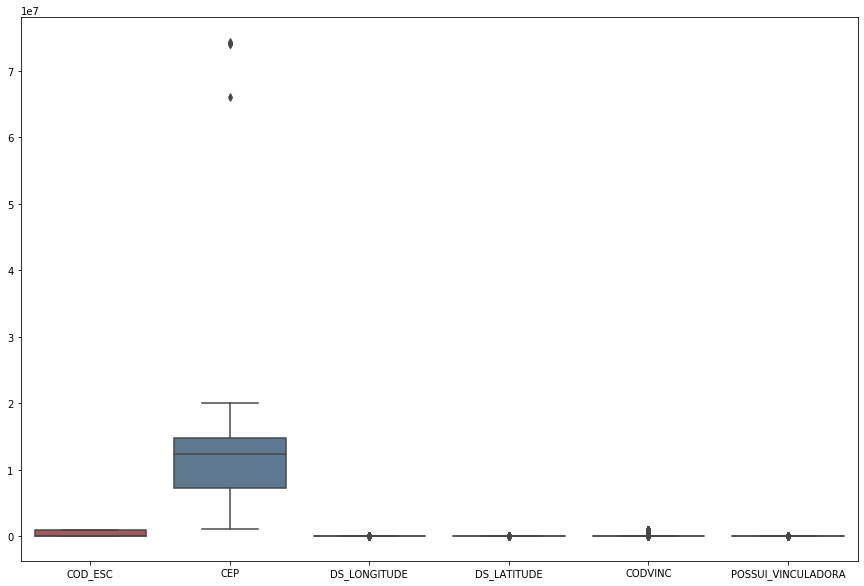

In [22]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_geolocation,
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p>
    Com exceção do codigo da escola, todos os demais campos apresentaram outliers, mas dado as caracteristicas desses campos, podemos ignorar essa informação. A seguir esta pontuada uma explicação sobre esses outliers:
    <ol>
        <li><b>CEP</b>: A informação do CEP atua de forma categórica, afinal todo endereço possui um CEP associado;</li>
        <li><b>DS_LONGITUDE e DS_LATITUDE</b>: São coordenadas geográficas, portanto não há muito o que fazer com tal informação, ja que isso possui caracteristicas cadastrais, o que podemos fazer posteriormente é validar essas coordenadas usando a biblioteca Folium;</li>
        <li><b>CODVINC</b>: Refere-se basicamente ao codigo de outra escola no qual esta associada, não apresenta muita informação com isso;</li>
        <li><b>POSSUI_VINCULADORA</b>: Classe binária que apenas indica se a escola possui uma vinculadora ou não;</li>
    </ol>
</p>

<a id = 'head4_62'></a>
<h4>6.2. Identificar e tratar outliers 'df_idesp_2019'</h4>

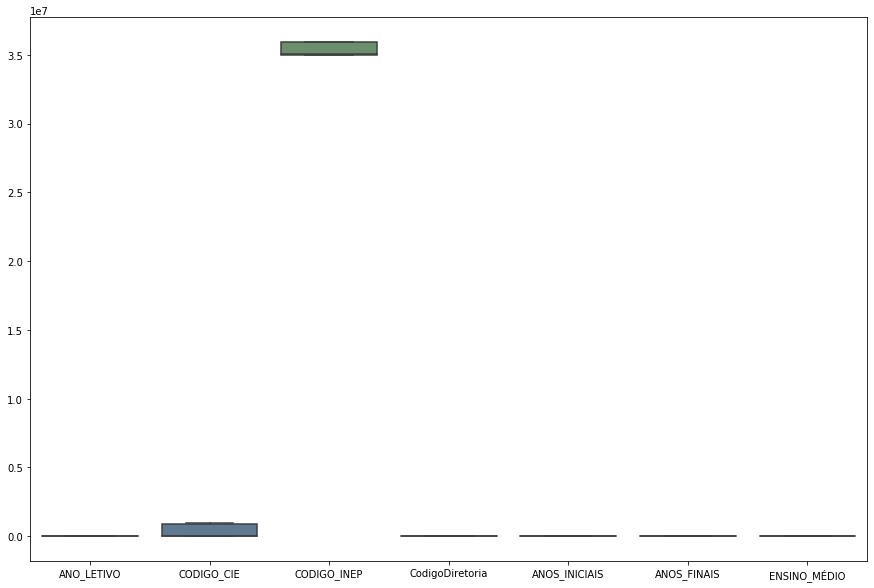

In [23]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Paleta de cores
sns_my_palete_01 = sns.color_palette('Set1', 
                                     n_colors = 8,
                                     desat = 0.5)

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_idesp_2019,
                 palette = sns_my_palete_01 )

## Exibir gráfico
plt.show()

<p>Não foram identificados outliers, mesmo nas variaveis que carregam as informações que serão preditas.🙏</p>

<a id = 'head4_63'></a>
<h4>6.3. Identificar e tratar outliers 'df_school_dependecy'</h4>
<p>Como existem muitas colunas, é interessante verificar os valores possiveis de cada coluna e assim determinar quais deverão ser analisadas, afinal, muitas possuem caracteristicas categoricas.</p>

In [24]:
## Lista de colunas numericas
lst_columns = df_school_dependecy.select_dtypes(include = np.number).columns.to_list()
lst_columns = [x for x in lst_columns if x not in('CODESC', 'TIPOESC')]

## Exibir quantidade de valores unicos por coluna
df_school_dependecy[lst_columns].nunique()


SALAS_AULA                      32
SALAS_ED_INF                     3
SALAS_ED_ESP                     4
SALAS_ED_ART                     3
SALA_RECURSO                     8
TOT_SALAS_AULA                  32
AUDITORIO                        3
ANFITEATRO                       5
TEATRO                           4
CANTINA                          3
COPA                             4
COZINHA                          6
REFEITORIO                       5
DEPOSITO_ALIMENTOS               7
DESPENSA                         8
TOT_DESPENSA                     9
SALA_LEITURA                     5
BIBLIOTECA                       4
TOT_SALA_LEITURA                 6
QUADRA_COBERTA                   4
QUADRA_DESCOBERTA                5
GINASIO                          2
TOT_QUADRA                       6
QUADRA_AREIA                     2
QUADRA_GRAMA                     2
CAMPO_FUTEBOL                    3
GABINETE_DENTARIO                3
CONSULTORIO_MEDICO               3
ENFERMARIA          

<p>Existem muitas colunas numericas, sendo assim precisaremos ver os valores unicos de cada coluna e sua quantidade. Uma tática interessante antes de ver coluna a coluna, é ver se tal coluna possui outliers, dessa forma conseguiremos filtrar com maior agilidade.</p>

In [25]:
def fn_validating_dataframe(p_df_dataframe):
    """
        Description:
            Valida algumas informações relacionadas ao dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            None

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
    
    if not (isinstance(p_df_dataframe, pd.DataFrame)):
            raise Exception("O objeto passado não é um pandas dataframe")
            
    if p_df_dataframe.empty:
            raise Exception("O dataframe esta vazio")

In [26]:
def fn_number_of_outliers_per_dataframe(p_df_dataframe):
    """
        Description:
            Retorna o numero de outliers por coluna em um dado dataframe

        Keyword arguments:
            p_df_dataframe -- Um pandas dataframe

        Return:
            Objeto com o numero de outliers por coluna em um dataframe

        Exception:
            Valida se o objeto passado é um dataframe
            Valida se o dataframe não esta vazio
    """
    
    fn_validating_dataframe(p_df_dataframe)
        
    Q1 = p_df_dataframe.quantile(0.25)
    Q3 = p_df_dataframe.quantile(0.75)
    IQR = Q3 - Q1
    sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    return sr_out

In [27]:
## Numero de outliers por coluna
sr_num_outliers = fn_number_of_outliers_per_dataframe(df_school_dependecy[lst_columns])
sr_num_outliers = sr_num_outliers[sr_num_outliers > 0]

In [28]:
## numero de colunas que possuem outliers
len(sr_num_outliers)

128

<p>Com o processo feito anteriormente conseguimos identificar que dentre as 172 colunas originais do dataframe, temos que 128 possuem outliers. Precisaremos ver coluna a coluna os outliers e assim determinar o que fazer com eles.</p>

In [29]:
def fn_catching_outliers(p_df_dataframe, p_column):
    """
    Description:
        Função que localiza outliers em um dataframe e retorna tais dados

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        df_with_outliers -- Dataframe with the outliers located
        df_without_outliers -- Dataframe without the outilers
    
    Exception:
        None
    """
    # Check if the information passed is valid.
    fn_number_of_outliers_per_dataframe(p_df_dataframe)
    
    # Calculate the first and the third qurtile of the dataframe  
    Q1 = p_df_dataframe[p_column].quantile(0.25)
    Q3 = p_df_dataframe[p_column].quantile(0.75)    
  
    
    # Calculate the interquartile value
    IQR = Q3 - Q1
    
    #sr_out = ((p_df_dataframe < (Q1 - 1.5 * IQR)) | (p_df_dataframe > (Q3 + 1.5 * IQR))).sum()
    
    # Generating the fence hig and low values
    fence_high = Q3 + (1.5 * IQR)
    fence_low = Q1 - (1.5 * IQR)
    
    # And Finally we are generating two dataframes, onde with the outliers values and the second with the values within values
    df_with_outliers = p_df_dataframe[((p_df_dataframe[p_column] < fence_low) | (p_df_dataframe[p_column] > fence_high))]
    
    if df_with_outliers.empty:
        print("No outliers were detected.")
    
    return df_with_outliers

In [30]:
def fn_show_individual_outlier(p_df_dataframe, p_column):
    """
    Description:
        Função que exibe um boxplot e as estatisticas descritivas de uma dada coluna de um dataframe

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        None
    
    Exception:
        None
    """
    ## Dataframe com as estatisticas descritivas
    df_summary = pd.DataFrame(p_df_dataframe[p_column].describe())

    ## Tamanho Figura
    plt.figure(figsize = (4, 6))
    
    ## Objeto referente ao boxplot
    ax = sns.boxplot(data = p_df_dataframe[p_column])
    
    ## deixando os x_ticks com valor em branco
    ax.set(xticklabels = [])
    ax.set(ylabel = None)
    
    ## Titulo do boxplot com o nome da coluna
    ax.set(title = 'Parâmetro: ' + p_column)
    
    ## Tabela que será gerada junto com o gráfico, onde tera as estatisticas
    statistics_table = plt.table( cellText = df_summary.values,
                                    rowLabels = df_summary.index,
                                    colLabels =  ' ',
                                    cellLoc = 'left', 
                                    rowLoc = 'center',            
                                    loc ='bottom')
    
    ## Tamanho da fonte da tabela
    statistics_table.set_fontsize(12)
    
    ## Escala da tabela
    statistics_table.scale(1, 2)
    
    ## Colocar a tabela debaixo do boxplot
    plt.subplots_adjust(left = 0.2, bottom = .1)
    
    ## Exibir figura
    plt.show()

In [31]:
## Verificando a coluna 'SALAS_AULA'
df_out = fn_catching_outliers(df_school_dependecy, 'SALAS_AULA')

## Verificar as primeiras escolas
df_out.head(5)

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,...,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
249,ESTADUAL - SE,ARARAQUARA,ARARAQUARA,ARARAQUARA,21854,BENTO DE ABREU,8,EE,Ativa,26,0,0,0,3,29,0,1,0,1,0,2,1,2,0,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
469,ESTADUAL - SE,BAURU,BAURU,BAURU,25598,CHRISTINO CABRAL PROF,8,EE,Ativa,26,0,0,2,0,26,1,0,0,1,1,1,1,1,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
847,ESTADUAL - SE,CAMPINAS OESTE,CAMPINAS,CAMPINAS OESTE,901124,CELESTE PALANDI DE MELLO PROFESSORA,8,EE,Ativa,29,0,1,0,0,29,0,0,0,1,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
897,ESTADUAL - SE,CAMPINAS OESTE,CAMPINAS,CAMPINAS OESTE,907397,PAUL EUGENE CHARBONNEAU PROF DOUTOR,8,EE,Ativa,26,0,0,0,0,26,0,0,0,0,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1153,ESTADUAL - SE,CENTRO,SAO PAULO,CONSOLACAO,3852,CAETANO DE CAMPOS CONSOLACAO,8,EE,Ativa,27,0,0,0,0,27,0,1,1,1,0,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


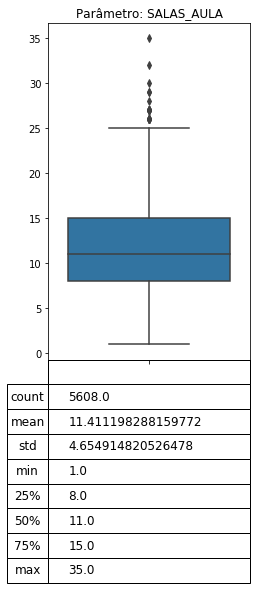

In [32]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_AULA')

<p>Tanto o boxplot quanto as estatisticas descritivas mostram que há outlier referentes ao parametro 'SALAS_AULA', entretanto tal parametro esta relacionado ao numero de salas de aula de uma escola, logo é muito comum escolas com poucas ou muitas salas. Esse tipo de outlier faz sentido</p>

In [33]:
## Verificando a coluna 'SALAS_ED_INF'
df_out = fn_catching_outliers(df_school_dependecy, 'SALAS_ED_INF')

## Verificar as primeiras escolas
df_out.head(5)

,NOMEDEP,DE,MUN,DISTR,CODESC,NOMESC,TIPOESC,TIPOESC_DESC,SITUACAO,SALAS_AULA,SALAS_ED_INF,SALAS_ED_ESP,SALAS_ED_ART,SALA_RECURSO,TOT_SALAS_AULA,AUDITORIO,ANFITEATRO,TEATRO,CANTINA,COPA,COZINHA,REFEITORIO,DEPOSITO_ALIMENTOS,DESPENSA,TOT_DESPENSA,...,SALA_ENTRETENIMENTO,SALA_ESTAGIO,SALA_GINASTICA,SALA_INSUMO_AGRICOLA,SALA_INSUMO_VETERINARIO,SALA_MARKETING,SALA_MATRICULA,SALA_MUSICA,SALA_POS_GRADUACAO,SALA_ORDENHA,SALA_PROC_PROD_AGROPECUARIOS,SALA_SEGURANCA,SALA_TELEFONIA,SALA_FINANCEIRO,SALA_PASTORAL,SALA_RESERV_AGUA,SERVIDOR,SILO,VARANDA,VIVEIRO,SALA_REORG_NEURO,SALA_TERAPIA_OCUP,SALA_SERIGRAFIA,SALA_MARCENARIA,QUIOSQUE
660,ESTADUAL - SE,BRAGANCA PAULISTA,SOCORRO,SOCORRO,912918,HELENA JOSE BONFA PROFESSORA,8,EE,Ativa,4,1,0,0,0,5,0,0,0,0,0,1,0,1,1,2,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
991,ESTADUAL - SE,CARAGUATATUBA,ILHABELA,ILHABELA,11228,GABRIEL RIBEIRO DOS SANTOS DOUTOR,8,EE,Ativa,19,1,0,0,0,20,0,0,0,1,1,4,2,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1907,ESTADUAL - SE,ITAPEVA,CAPAO BONITO,CAPAO BONITO,926036,BAIRRO TURVO DOS ALMEIDAS,8,EE,Ativa,7,3,0,0,0,10,0,0,0,0,0,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


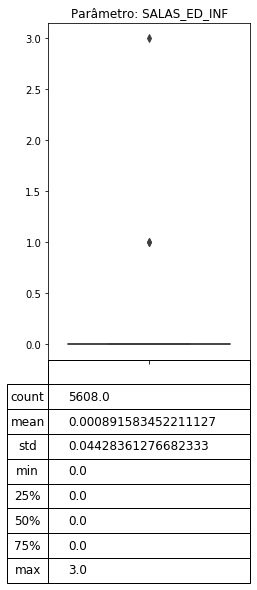

In [34]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_INF')

<p>Tanto o boxplot quanto as estatisticas descritivas mostram que há outlier referentes ao parametro 'SALAS_ED_INF', entretanto tal parametro esta relacionado a salas de educação infantil, não é uma situação muito comum, mas faz sentido escolas terem salas para crianças, algo bem comum em pré-escolas.</p>

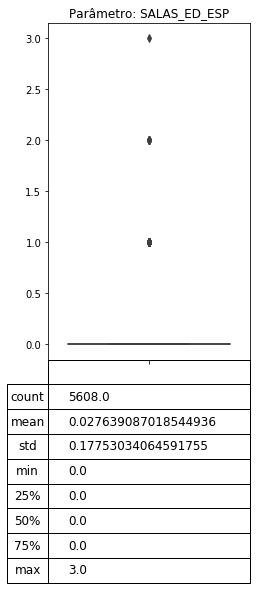

In [35]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_ESP')

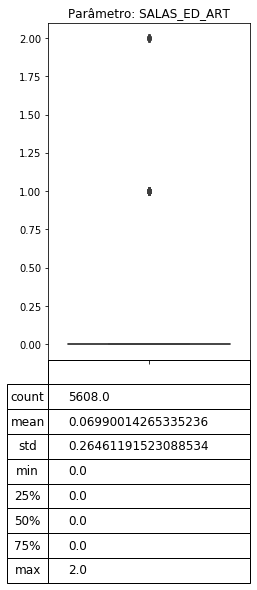

In [36]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALAS_ED_ART')

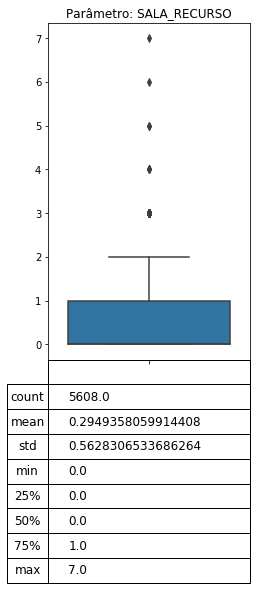

In [37]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_RECURSO')

<p>Os parâmetros 'SALAS_ED_ESP', 'SALAS_ED_ART' 'SALA_RECURSO' referem-se respectivamente a salas de educação especial, salas de educação artística e salas de recurso que nada mais são do que salas extras com propositos distintos, não é incomum escolas terems salas e recursos distintos.</p>

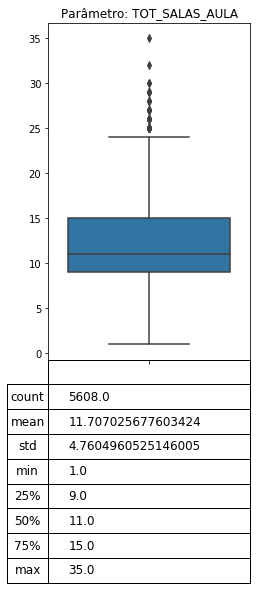

In [38]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SALAS_AULA')

<p>Dado que existem escolas pequenas e grandes no dataset bem como escolas com salas distintas das demais, como sala de educação artística, é comum haver outliers no total de salas. Para evitar problemas futuros de multicolinearidade, os hiperparametros referentes as salas serão removidos, pois o 'TOT_SALAS_AULA' possui o valor agrupado.</p>

In [39]:
## Dado as possiveis alterações, uma copia deverá ser feita
df_school_dependecy_treat = df_school_dependecy.copy(deep = True)

## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SALAS_ED_INF', 'SALAS_ED_ESP', 
                                                     'SALAS_ED_ART', 'SALA_RECURSO',
                                                     'SALAS_AULA'])

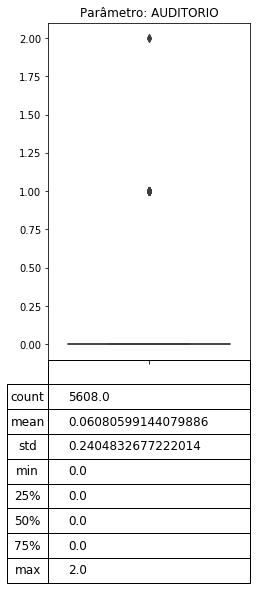

In [40]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AUDITORIO')

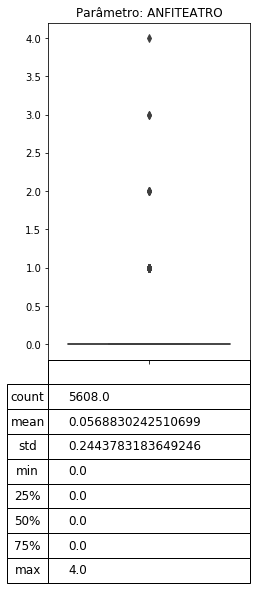

In [41]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ANFITEATRO')

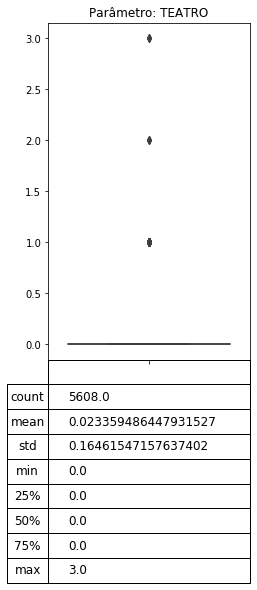

In [42]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TEATRO')

<p>Os parametros referentes ao auditorio, anfiteatro e teatro apresentam muitos outliers, mas faz sentido essa discrepancia por que há escolas com tais dependencias ou não, e algumas com mais de uma.</p>

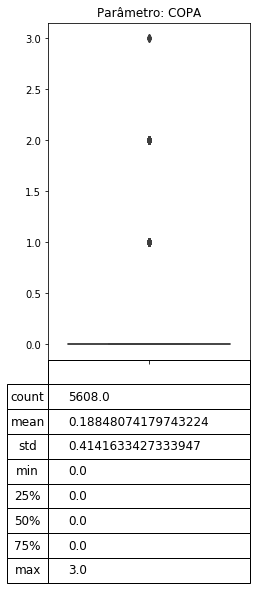

In [43]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'COPA')

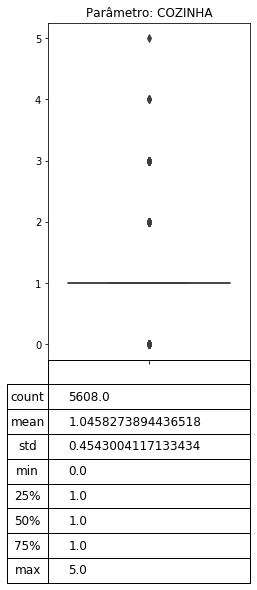

In [44]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'COZINHA')

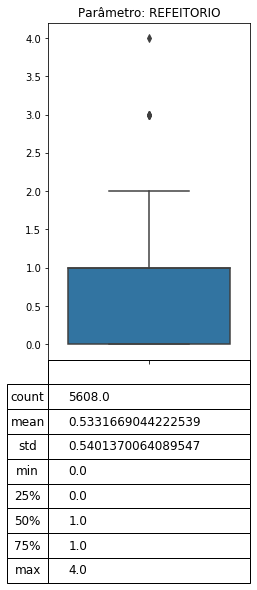

In [45]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'REFEITORIO')

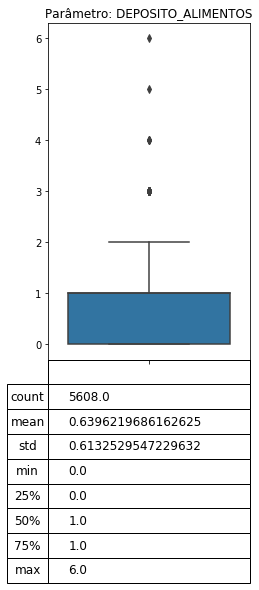

In [46]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPOSITO_ALIMENTOS')

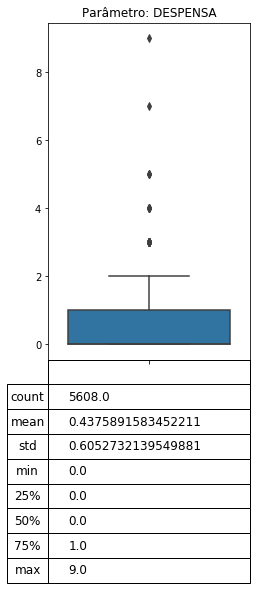

In [47]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DESPENSA')

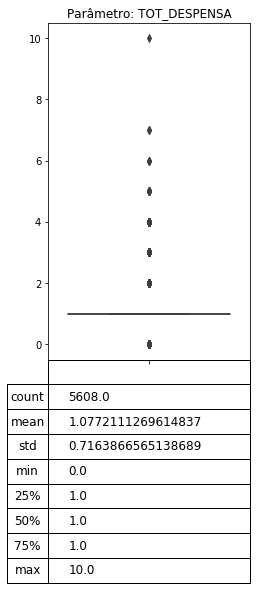

In [48]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_DESPENSA')

<p>As informações mostradas anteriormente se referem a alimentação como um todo nas escolas, onde os principais parametros relacionados a cozinha forma mostrados e em todos foram identificados outliers. O parametro com uma quantidade elevada de outliers foi o 'TOT_DESPENSA' que basicamente é oriundo de um calculo envolvendo os demais parametros. Nesse primeiro momento e devido a quantidade de outliers ele será removido do dataframe.</p>

In [49]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_DESPENSA'])

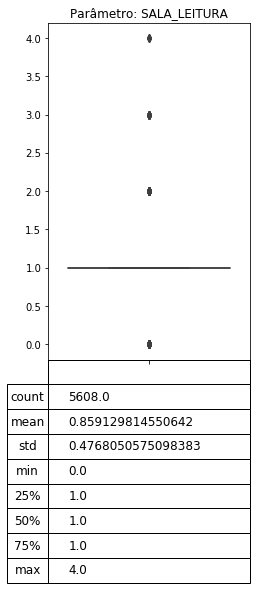

In [50]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_LEITURA')

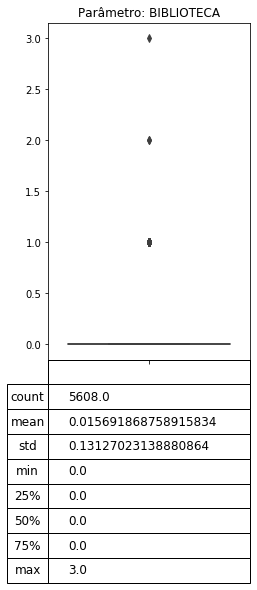

In [51]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'BIBLIOTECA')

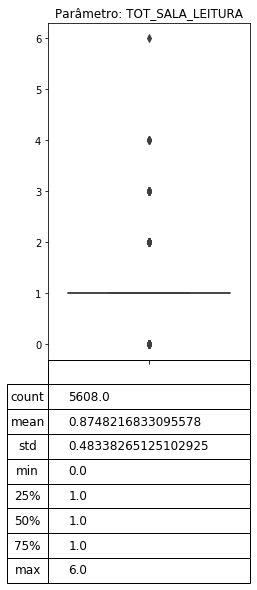

In [52]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SALA_LEITURA')

<p>Os parâmetros referentes a quantidade de salas de leitura e bibliotecas, fazem sentido pra regra de negocio. Entretanto a variavel TOT_SALA_LEITURA será removido pois seus dados ja são refletidos nas demais variaveis.</p>

In [53]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_SALA_LEITURA'])

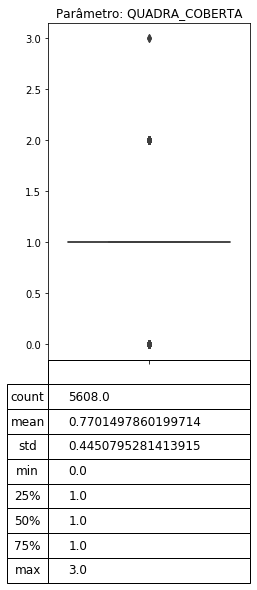

In [54]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_COBERTA')

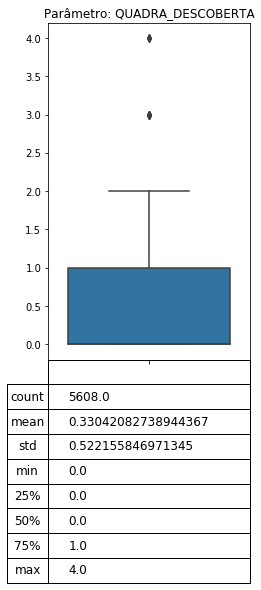

In [55]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_DESCOBERTA')

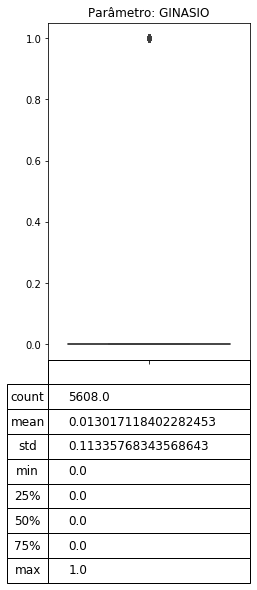

In [56]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'GINASIO')

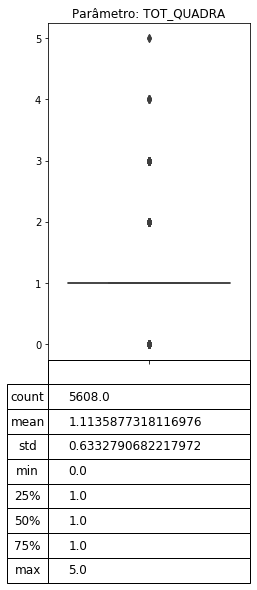

In [57]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_QUADRA')

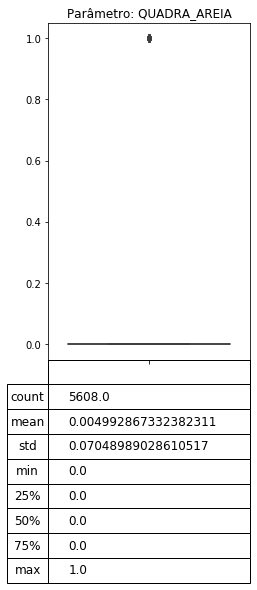

In [58]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_AREIA')

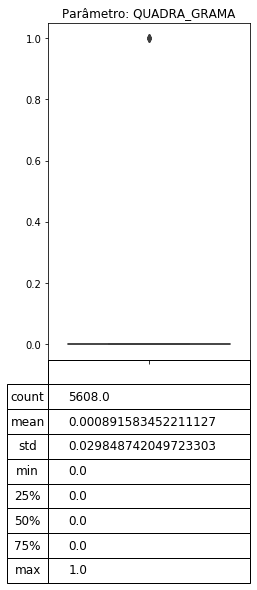

In [59]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'QUADRA_GRAMA')

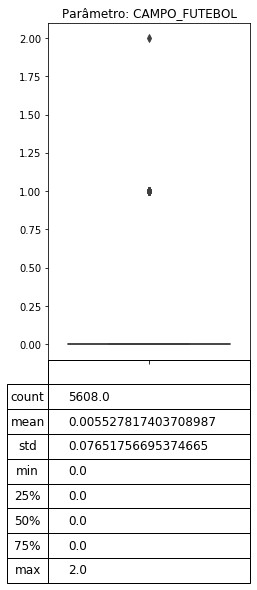

In [60]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CAMPO_FUTEBOL')

<p>Os outliers apresentados das colunas <b>QUADRA_COBERTA, QUADRA_DESCOBERTA, GINASIO, TOT_QUADRA, QUADRA_AREIA, QUADRA_GRAMA e CAMPO_FUTEBOL </b>são referentes as quadras e ginasios, e os valores apresentados nos boxplots não apresentam nenhuma discrepancia do comum, portanto eles serão mantidos. A unica alteração feita será a exclusão da TOT_QUADRA pois o que ela representa ja esta relacionado aos demais parametros.</p>

In [61]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_QUADRA'])

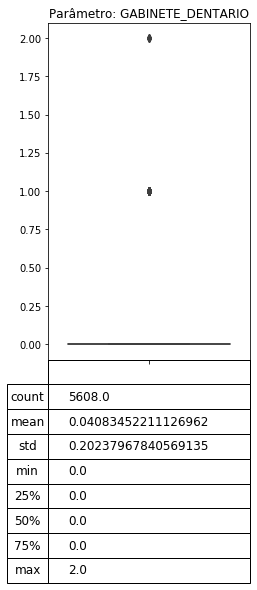

In [62]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'GABINETE_DENTARIO')

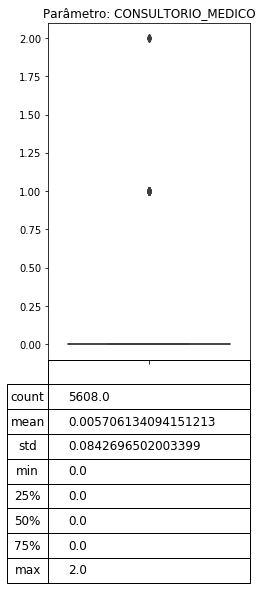

In [63]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CONSULTORIO_MEDICO')

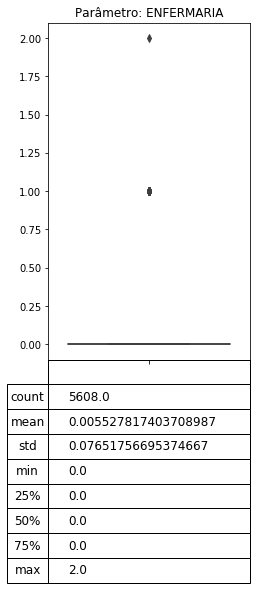

In [64]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ENFERMARIA')

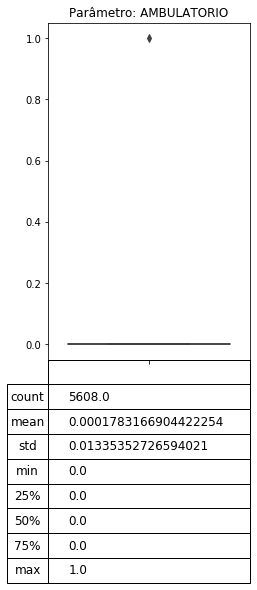

In [65]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AMBULATORIO')

<p>Os hiperparâmetros <b>AMBULATORIO, ENFERMARIA, CONSULTORIO_MEDICO e GABINETE_DENTARIO</b> por mais que apresentem outliers, nenhum deles é discrepante, além do mais fazem sentido para o negocio, portanto serão mantidos.</p>

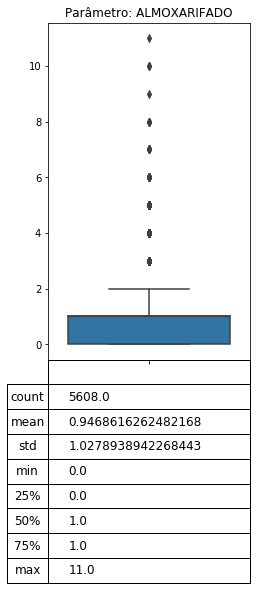

In [66]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ALMOXARIFADO')

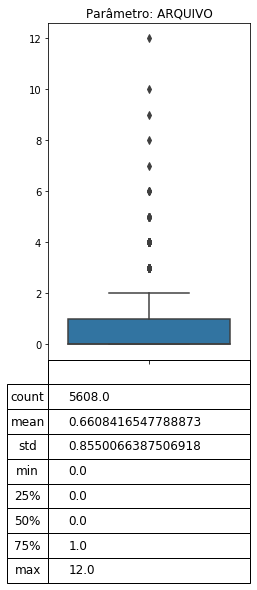

In [67]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ARQUIVO')

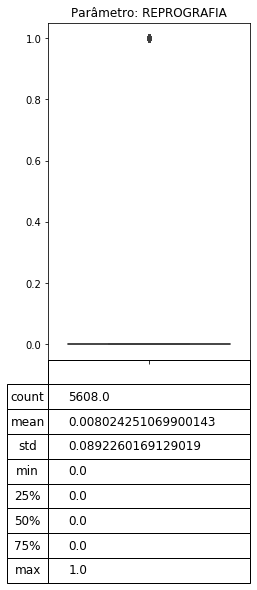

In [68]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'REPROGRAFIA')

<p>Os hiperparâmetros <b>ALMOXARIFADO, ARQUIVO, e REPROGRAFIA</b> por mais que apresentem outliers, nenhum deles é discrepante, além do mais fazem sentido para o negocio, portanto serão mantidos.</p>

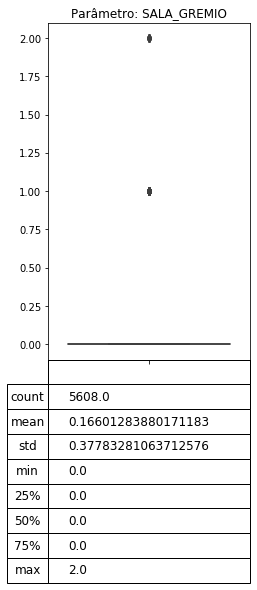

In [69]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_GREMIO')

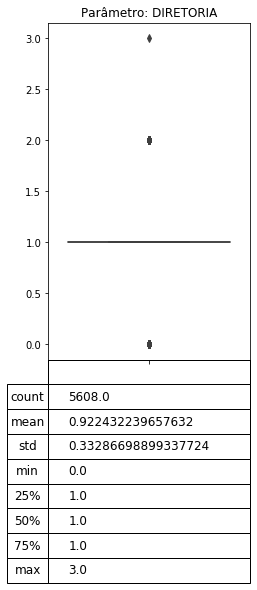

In [70]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DIRETORIA')

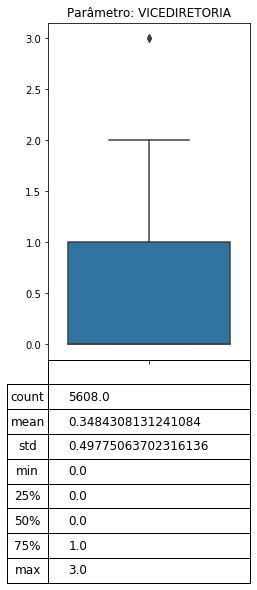

In [71]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VICEDIRETORIA')

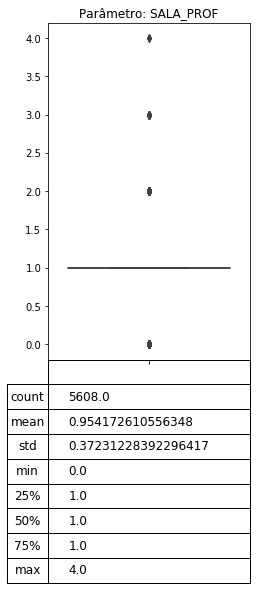

In [72]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_PROF')

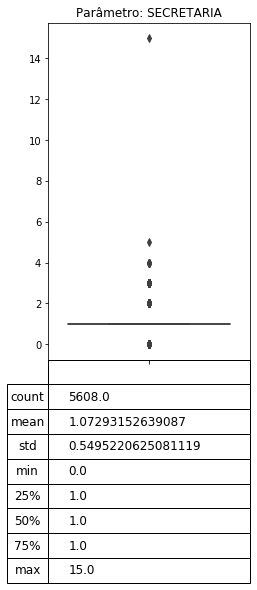

In [73]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SECRETARIA')

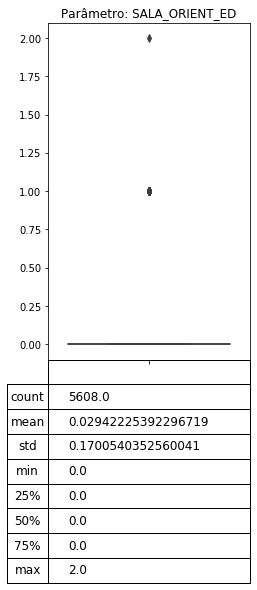

In [74]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_ORIENT_ED')

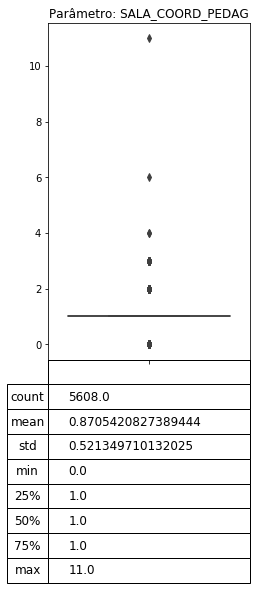

In [75]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_COORD_PEDAG')

<p>Os hiperparâmetros <b>SALA_GREMIO, DIRETORIA, VICEDIRETORIA, SALA_PROF, SECRETARIA, SALA_ORIENT_ED e SALA_COORD_PEDAG, e REPROGRAFIA</b> por mais que apresentem outliers, nenhum deles é discrepante, além do mais fazem sentido para o negocio, portanto serão mantidos.</p>

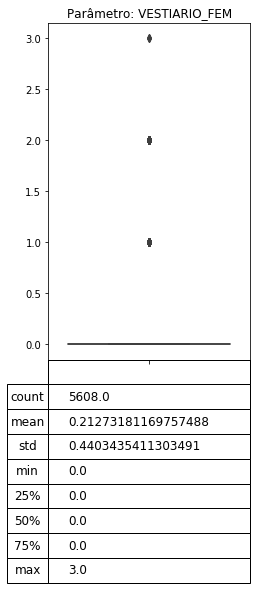

In [76]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VESTIARIO_FEM')

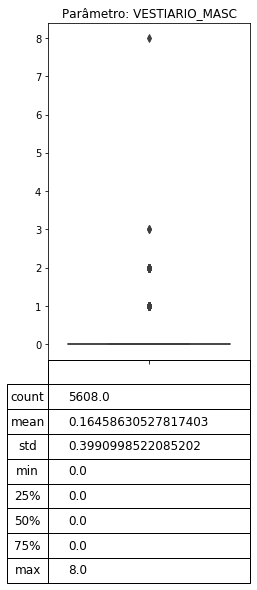

In [77]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VESTIARIO_MASC')

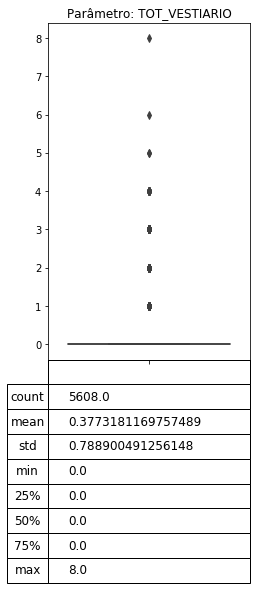

In [78]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_VESTIARIO')

<p>Os hiperparâmetros <b>VESTIARIO_FEM, VESTIARIO_MASC, e TOT_VESTIARIO</b> por mais que apresentem outliers, nenhum deles é discrepante, e além do mais fazem sentido para o negocio, todavia para evitar multicolinearidade, iremos retirar o hiperparametro 'TOT_VESTIARIO'</p>

In [79]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['TOT_VESTIARIO'])

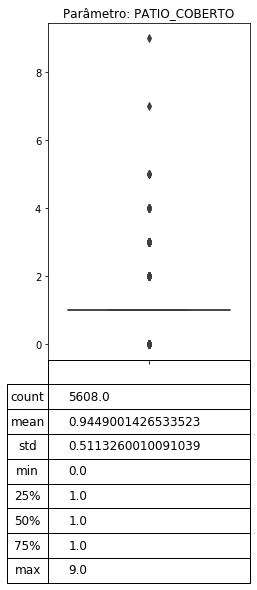

In [80]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'PATIO_COBERTO')

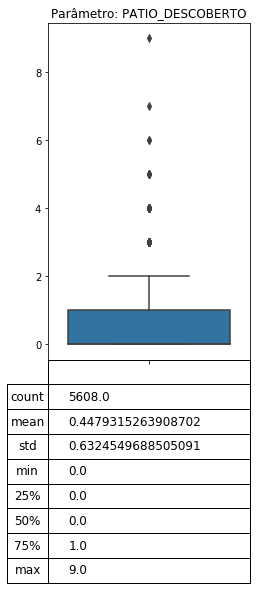

In [81]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'PATIO_DESCOBERTO')

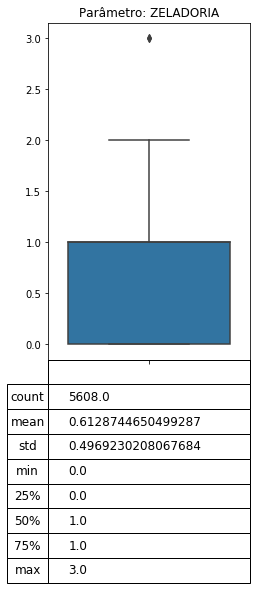

In [82]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ZELADORIA')

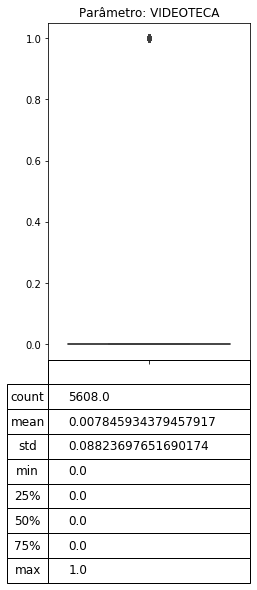

In [83]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VIDEOTECA')

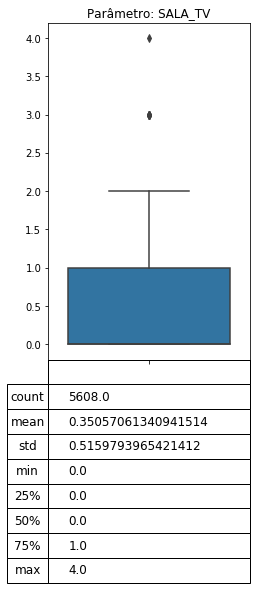

In [84]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_TV')

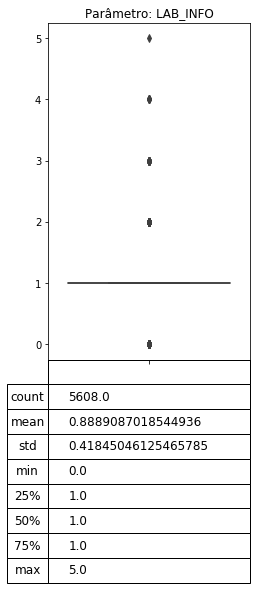

In [85]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_INFO')

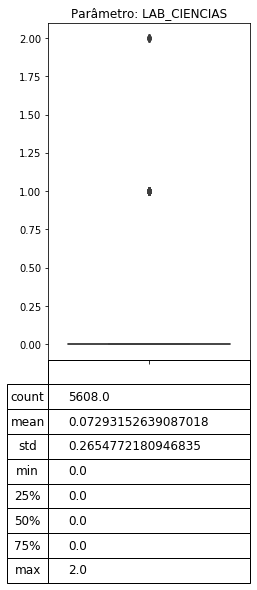

In [86]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_CIENCIAS')

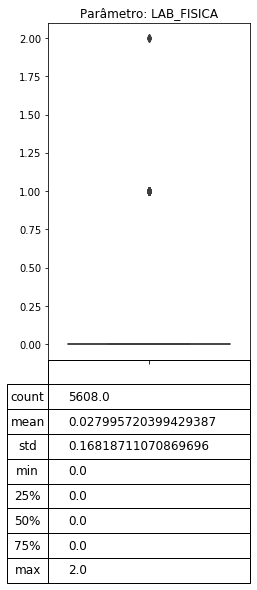

In [87]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_FISICA')

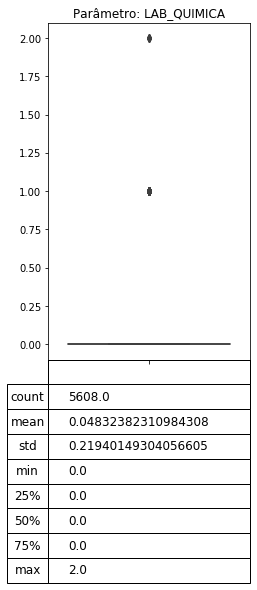

In [88]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_QUIMICA')

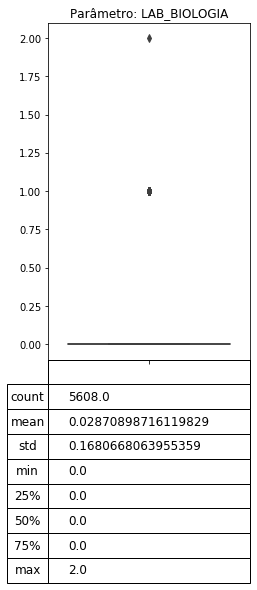

In [89]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_BIOLOGIA')

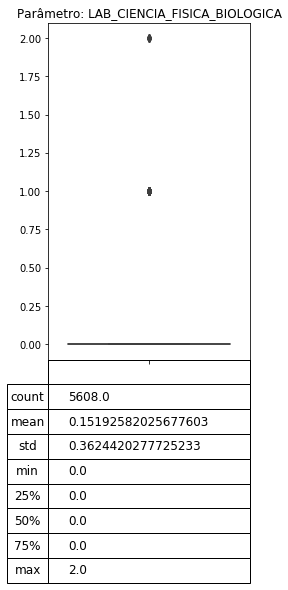

In [90]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_CIENCIA_FISICA_BIOLOGICA')

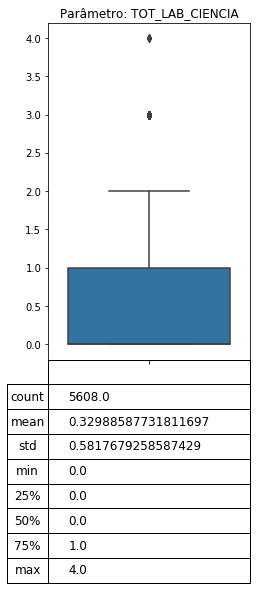

In [91]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_LAB_CIENCIA')

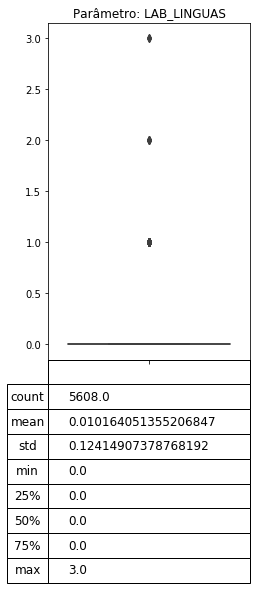

In [92]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_LINGUAS')

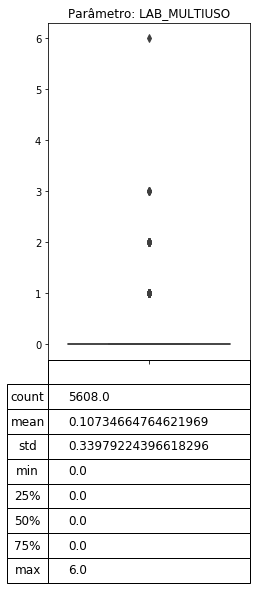

In [93]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_MULTIUSO')

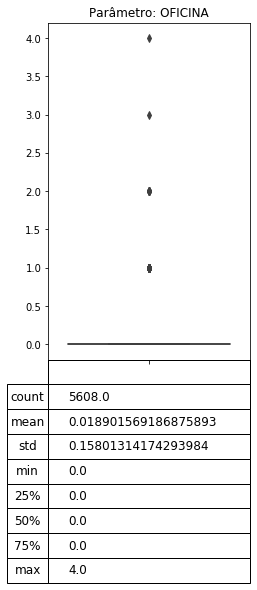

In [94]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'OFICINA')

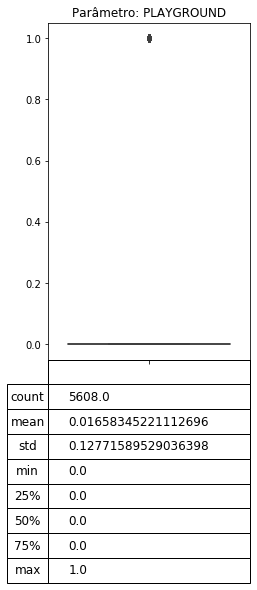

In [95]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'PLAYGROUND')

<p>Os hiperparâmetros <b>VIDEOTECA, SALA_TV, LAB_INFO, LAB_CIENCIAS, LAB_FISICA, LAB_QUIMICA, LAB_BIOLOGIA, LAB_CIENCIA_FISICA_BIOLOGICA, TOT_LAB_CIENCIA, LAB_LINGUAS, LAB_MULTIUSO, OFICINA e PLAYGROUND</b> possuem muitos outliers, entretanto esses outliers são explicados pelo negócio. Os unicos hiperparametros que serão alterados serão 'LAB_CIENCIA_FISICA_BIOLOGICA' e 'TOT_LAB_CIENCIA', que nesse caso serão removidos por serem um valor agrupado dos hiperparametros ja passados.</p>

In [96]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['LAB_CIENCIA_FISICA_BIOLOGICA', 'TOT_LAB_CIENCIA'])

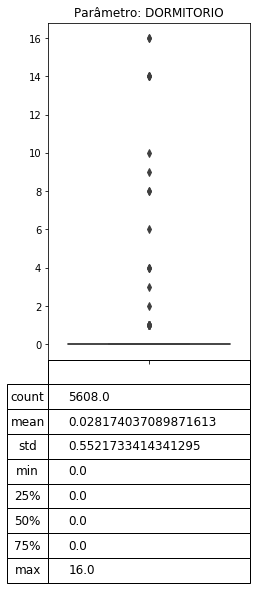

In [97]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DORMITORIO')

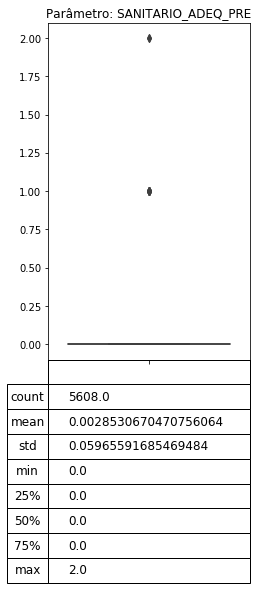

In [98]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_PRE')

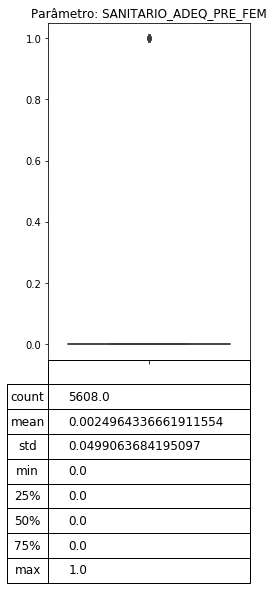

In [99]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_PRE_FEM')

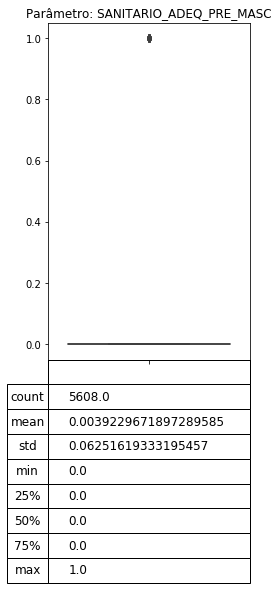

In [100]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_PRE_MASC')

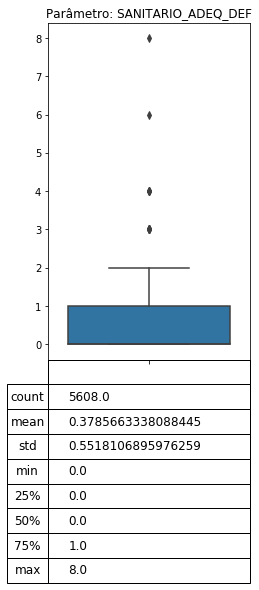

In [101]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_DEF')

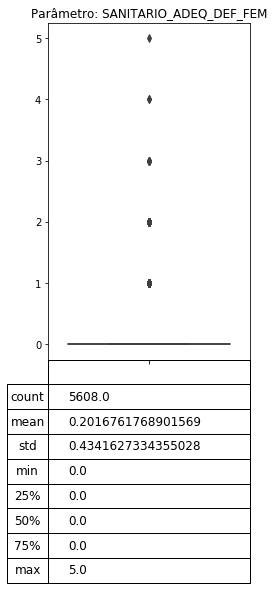

In [102]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_DEF_FEM')

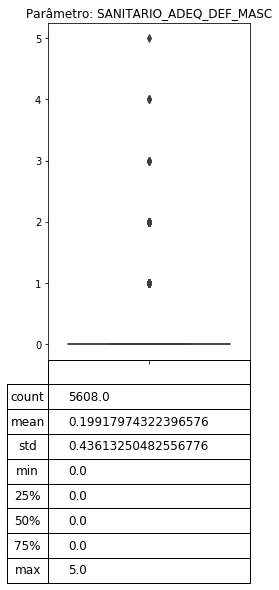

In [103]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_ADEQ_DEF_MASC')

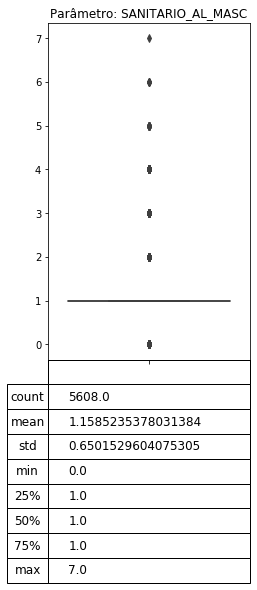

In [104]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_AL_MASC')

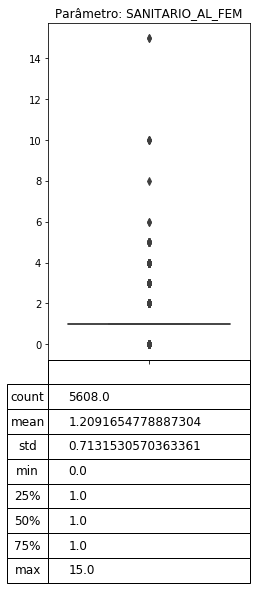

In [105]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_AL_FEM')

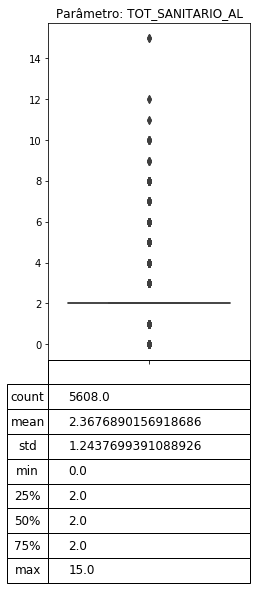

In [106]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_AL')

<p>Os outliers referentes aos hiperparâmetros <b>DORMITORIO, SANITARIO_ADEQ_PRE, SANITARIO_ADEQ_PRE_FEM, SANITARIO_ADEQ_PRE_MASV, SANITARIO_ADEQ_DEF, SANITARIO_ADEQ_DEF_FEM, SANITARIO_ADEQ_DEF_MASC, SANITARIO_AL_MASC, SANITARIO_AL_FEM E TOT_SANITATIO_AL</b> são congruentes com o negocio, sendo assim eles podem ser mantido , entretanto, como alguns deles se referem a diferentes tipos de sanitarios, os unicos hiperparametros que serão mantidos dessa leva serão 'DORMITORIO' e 'TOT_SANITAIO_AL'</p>

In [107]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SANITARIO_ADEQ_PRE_FEM', 'SANITARIO_ADEQ_PRE', 
                                                     'SANITARIO_ADEQ_PRE_MASC', 'SANITARIO_ADEQ_DEF',
                                                     'SANITARIO_ADEQ_DEF_FEM', 'SANITARIO_ADEQ_DEF_MASC',
                                                     'SANITARIO_AL_MASC', 'SANITARIO_AL_FEM'])

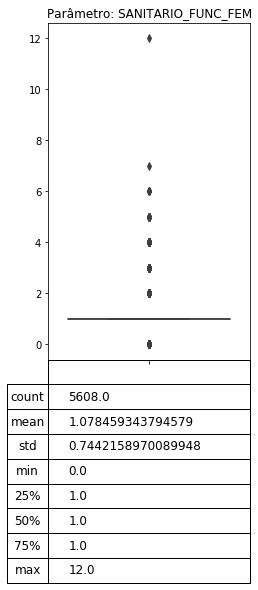

In [108]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_FUNC_FEM')

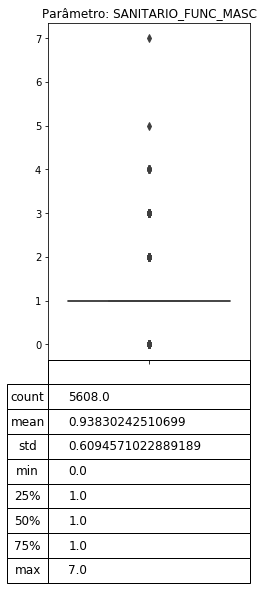

In [109]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SANITARIO_FUNC_MASC')

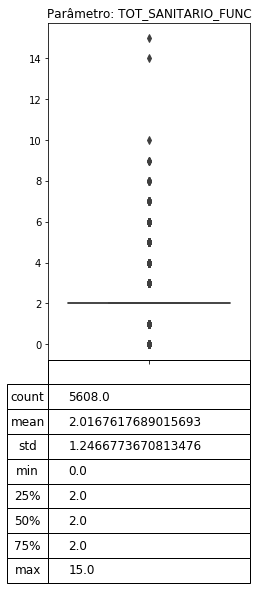

In [110]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

<p>Assim como foi adotado anteriormente em relação aos sanitarios dos alunos, faremos com os sanitarios dos funcionarios, manteremos apenas o hiperparametro 'TOT_SANITARIO_FUNC'</p>

In [111]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['SANITARIO_FUNC_FEM', 'SANITARIO_FUNC_MASC'])

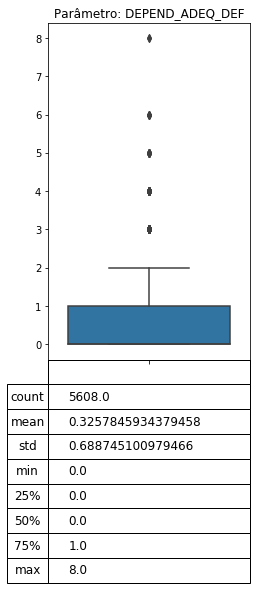

In [112]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPEND_ADEQ_DEF')

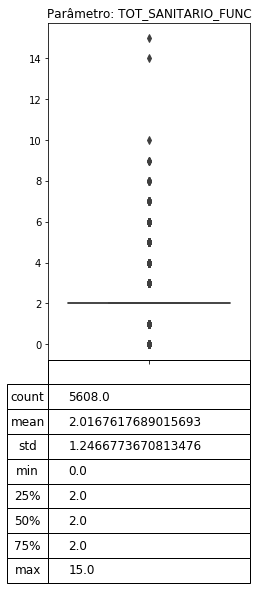

In [113]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

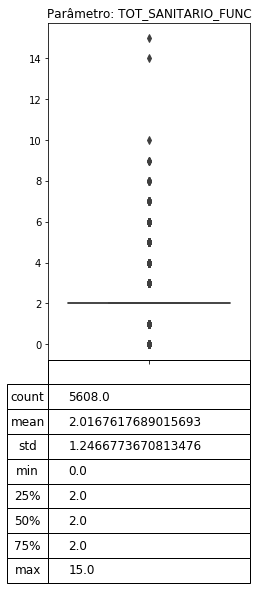

In [114]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

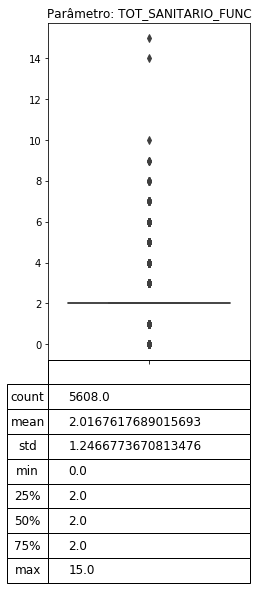

In [115]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

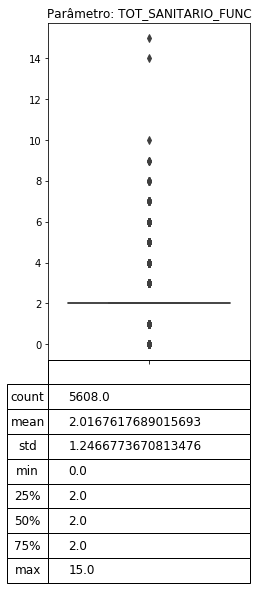

In [116]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

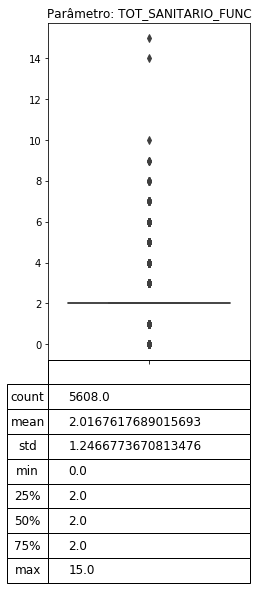

In [117]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

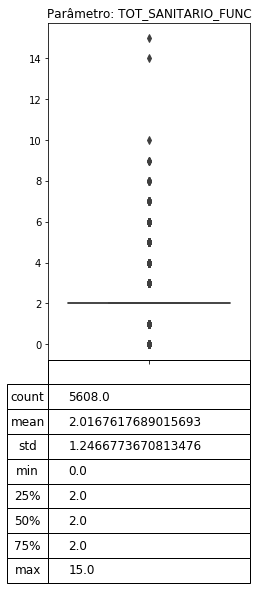

In [118]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

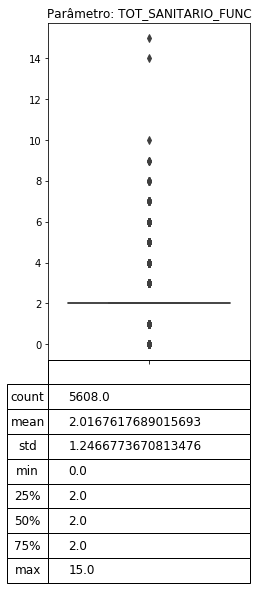

In [119]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

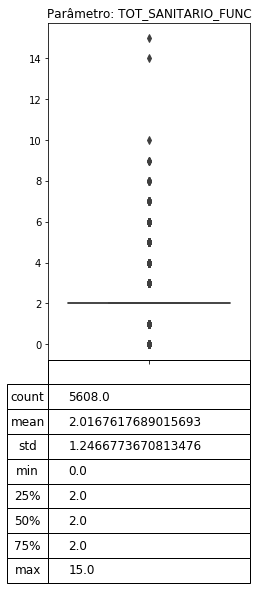

In [120]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TOT_SANITARIO_FUNC')

<p>Os outliers referentes aos hiperparametros: <b>DEPEND_ADEQ_DEF, SALA_ED_FISICA, PISCINA, PORTARIA, SALA_PROG_ESC_FAMILIA, BRINQUEDOTECA, FRALDARIO, LAVANDERIA e SOLARIO</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

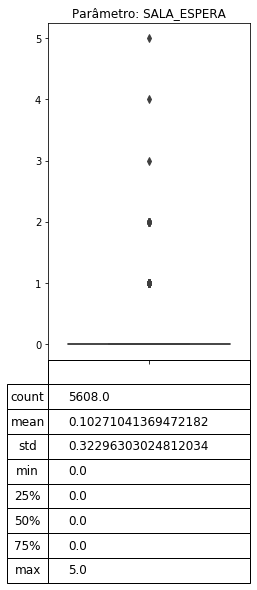

In [121]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_ESPERA')

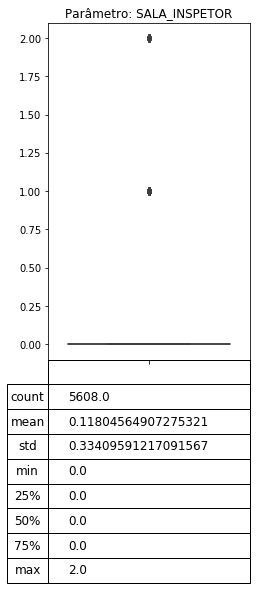

In [122]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_INSPETOR')

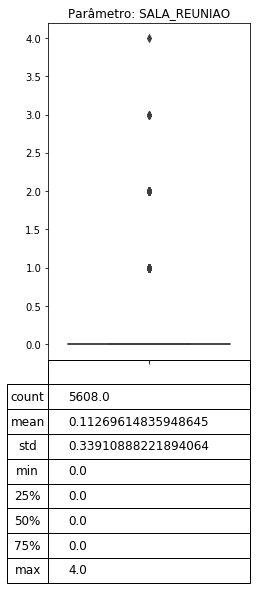

In [123]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_REUNIAO')

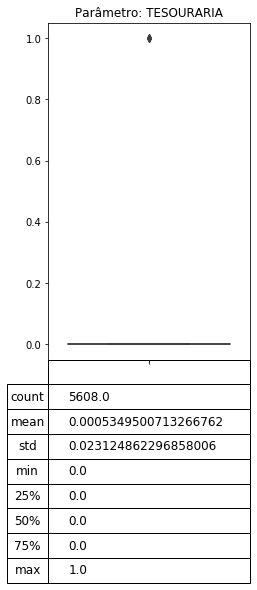

In [124]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'TESOURARIA')

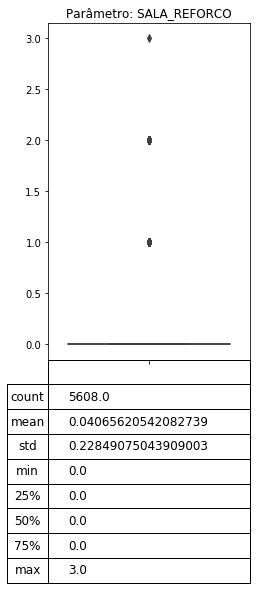

In [125]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_REFORCO')

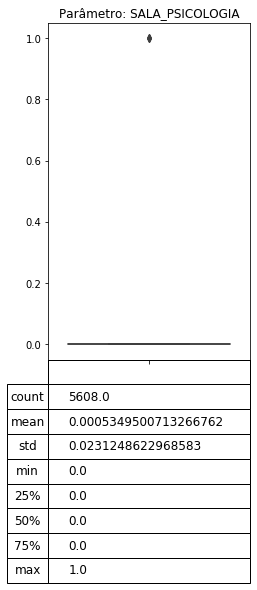

In [126]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_PSICOLOGIA')

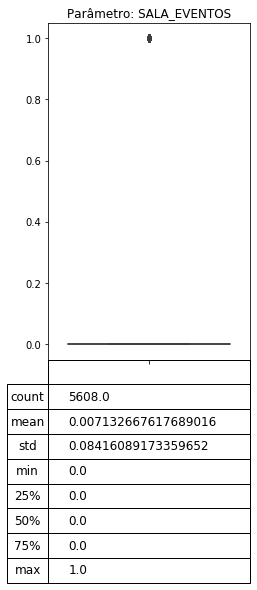

In [127]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_EVENTOS')

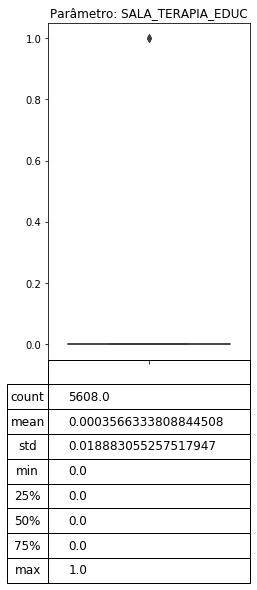

In [128]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SALA_TERAPIA_EDUC')

<p>Os outliers referentes aos hiperparametros: <b>SALA_ESPERA, SALA_INSPETOR, SALA_REUNIAO, TESOURARIA, SALA_REFORCO, SALA_PSICOLOGIA, SALA_EVENTOS, e SALA_TERAPIA_EDUC</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

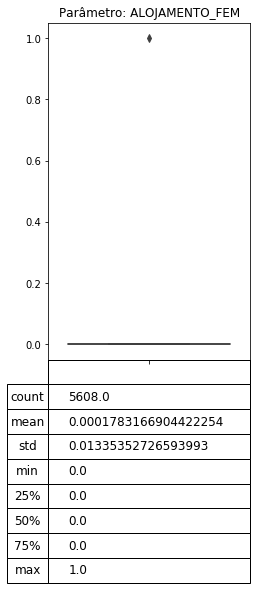

In [129]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ALOJAMENTO_FEM')

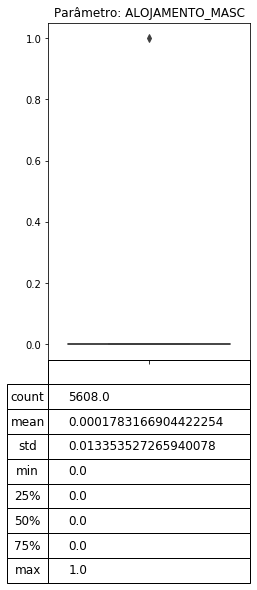

In [130]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ALOJAMENTO_MASC')

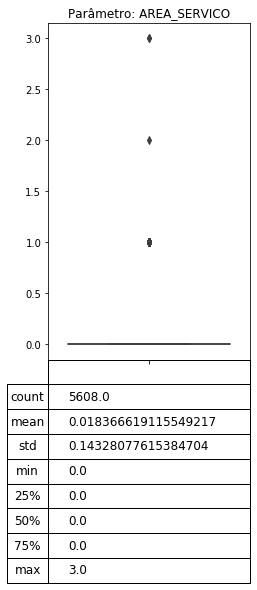

In [131]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'AREA_SERVICO')

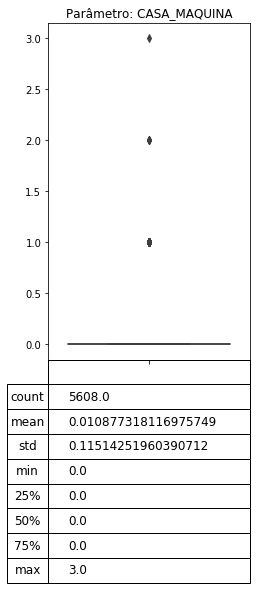

In [132]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CASA_MAQUINA')

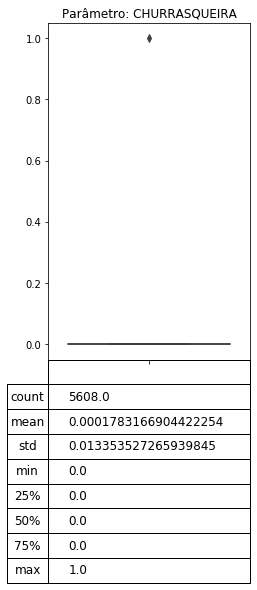

In [133]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'CHURRASQUEIRA')

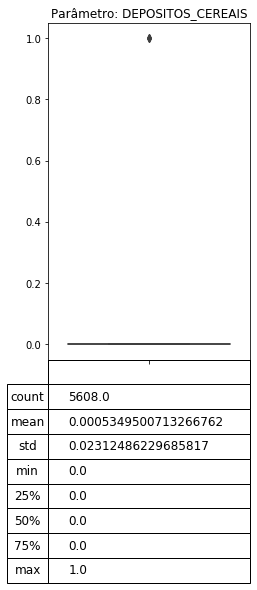

In [134]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'DEPOSITOS_CEREAIS')

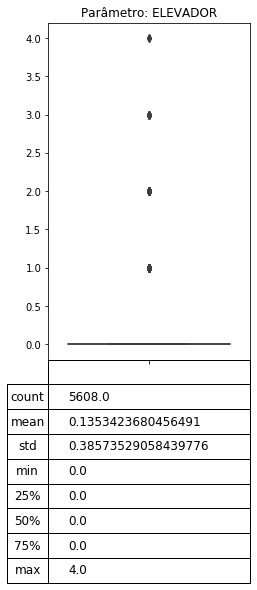

In [135]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ELEVADOR')

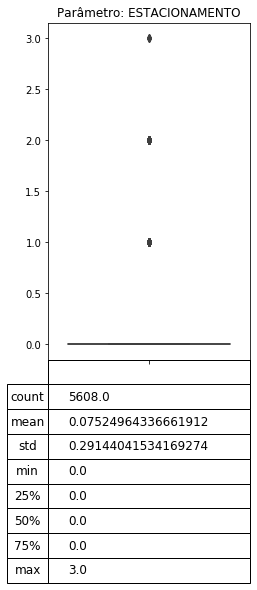

In [136]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ESTACIONAMENTO')

<p>Os outliers referentes aos hiperparametros: <b>ALOJAMENTO_FEM, ALOJAMENTO_MASC, TOT_ALOJAMENTO, AREA_SERVICO, CASA_MAQUINA, CHURRASQUEIRA, DEPOSITOS_CEREAIS, ELEVADOR e ESTACIONAMENTO</b> são congruentes com o negocio, sendo assim eles serão mantidos, com exceção das colunas 'ALOJAMENTO_FEM' e 'ALOJAMENTO_MASC' ja que temos uma coluna representanto seu total.</p>

In [137]:
## Deletando colunas desnecessarias
df_school_dependecy_treat = df_school_dependecy_treat \
                                    .drop(columns = ['ALOJAMENTO_FEM', 'ALOJAMENTO_MASC'])

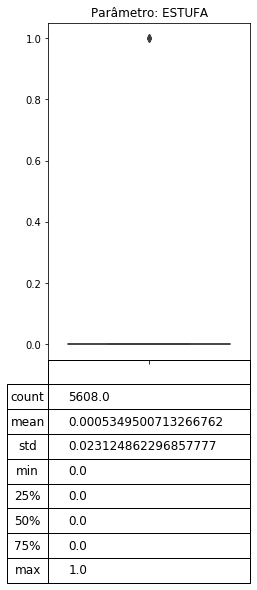

In [138]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'ESTUFA')

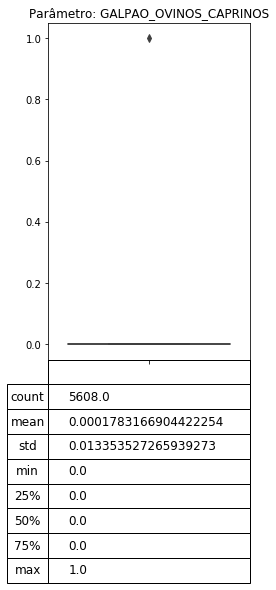

In [139]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'GALPAO_OVINOS_CAPRINOS')

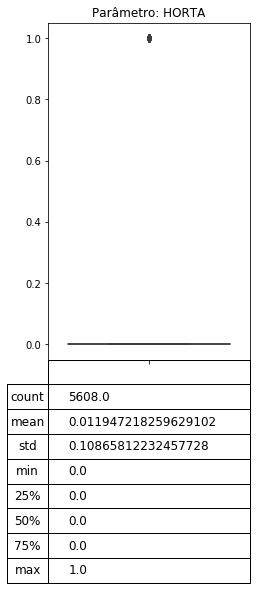

In [140]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'HORTA')

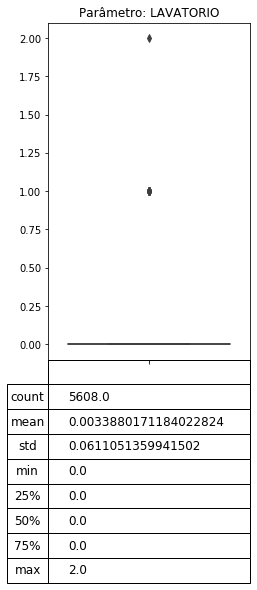

In [141]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAVATORIO')

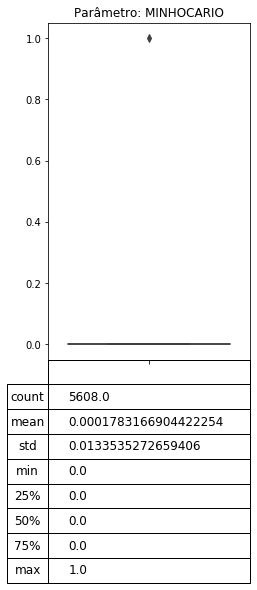

In [142]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'MINHOCARIO')

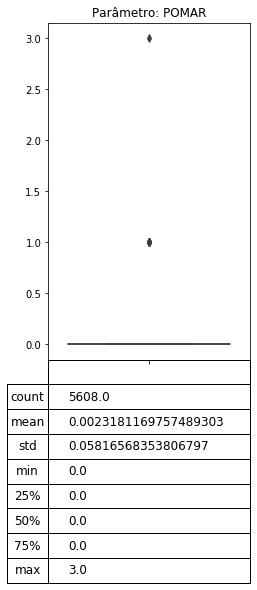

In [143]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'POMAR')

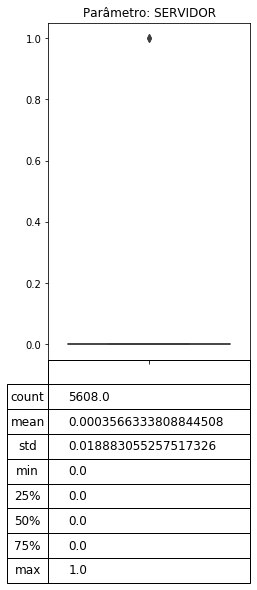

In [144]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'SERVIDOR')

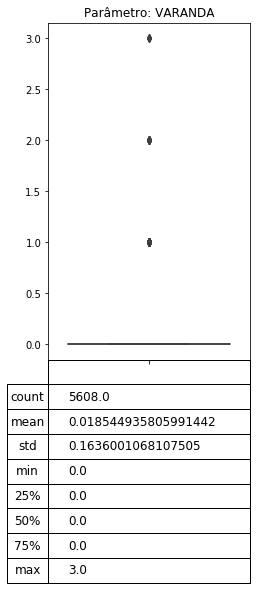

In [145]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VARANDA')

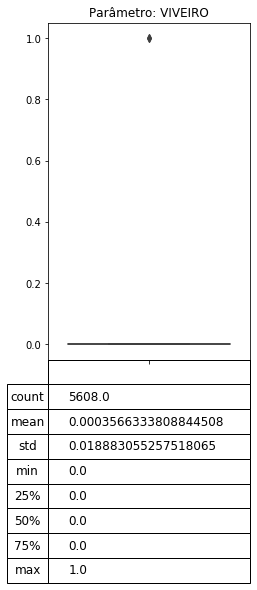

In [146]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'VIVEIRO')

<p>Os outliers referentes aos hiperparametros: <b>ESTUFA, GALPAO_OVINOS_CAPRINOS, HORTA, LAVATORIO, MINHOCARIO, POMAR, SERVIDOR, VARANDA e VIVEIRO</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

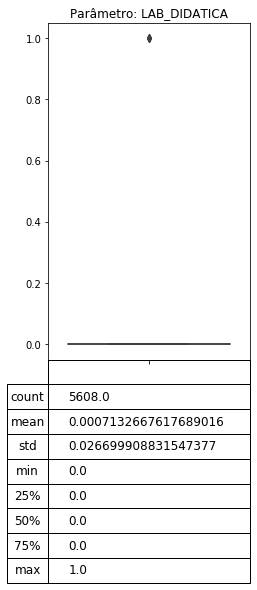

In [147]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_DIDATICA')

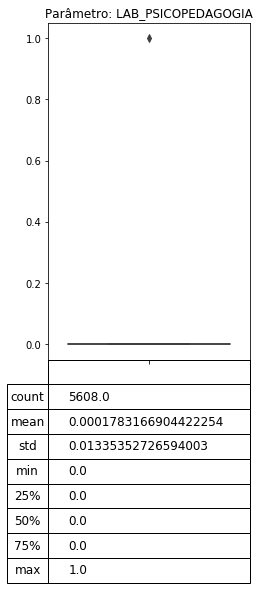

In [148]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_PSICOPEDAGOGIA')

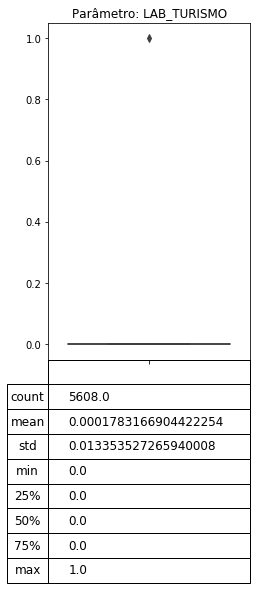

In [149]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'LAB_TURISMO')

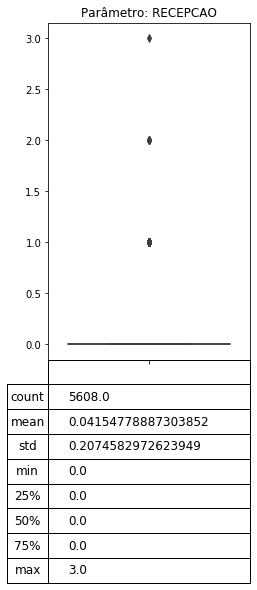

In [150]:
## Exibir o Boxplot
fn_show_individual_outlier(df_school_dependecy, 'RECEPCAO')

<p>Os outliers referentes aos hiperparametros: <b>LAB_DIDATICA, LAB_PSICOPEDAGOGIA, LAB_TURISMO e RECEPCAO</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

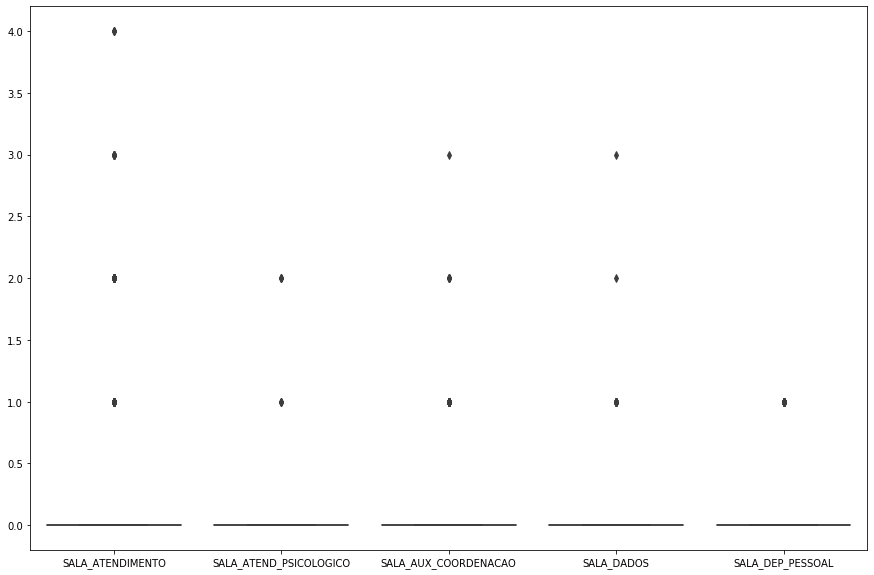

In [151]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_ATENDIMENTO', 'SALA_ATEND_PSICOLOGICO', 
                                                    'SALA_AUX_COORDENACAO', 'SALA_DADOS',
                                                    'SALA_DEP_PESSOAL']])

## Exibir gráfico
plt.show()

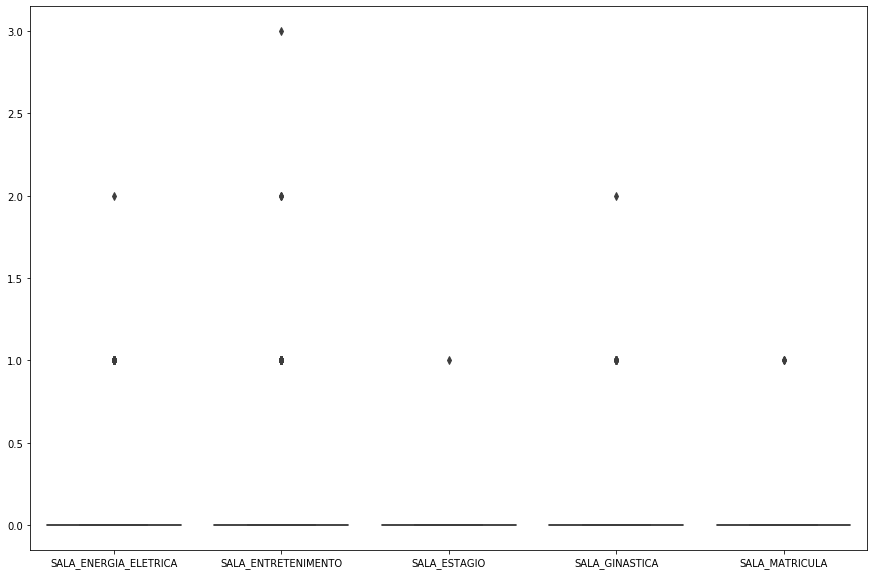

In [152]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_ENERGIA_ELETRICA', 'SALA_ENTRETENIMENTO', 
                                                    'SALA_ESTAGIO', 'SALA_GINASTICA',
                                                    'SALA_MATRICULA']])

## Exibir gráfico
plt.show()

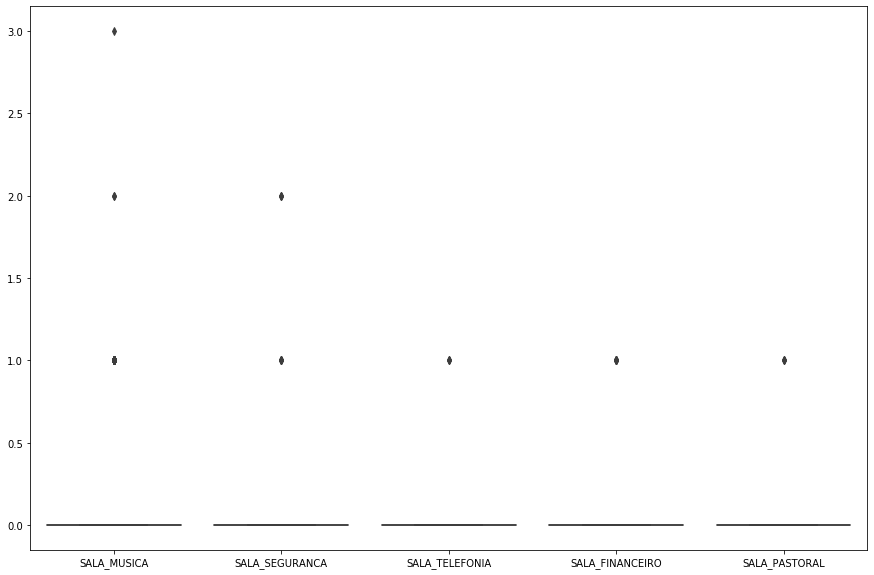

In [153]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_MUSICA', 'SALA_SEGURANCA', 
                                                    'SALA_TELEFONIA', 'SALA_FINANCEIRO',
                                                    'SALA_PASTORAL']])

## Exibir gráfico
plt.show()

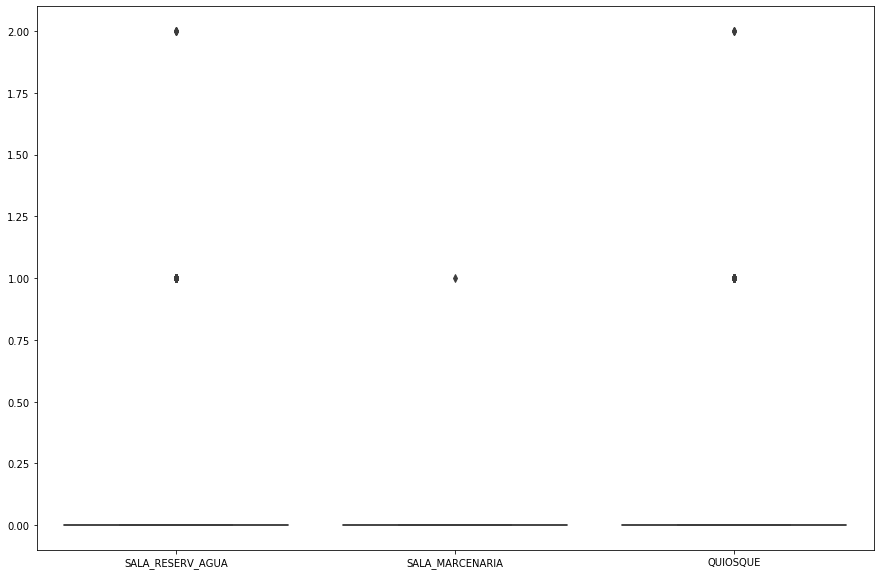

In [154]:
## Tamanho da figura
plt.figure(figsize = (15,10))

## Criação do objeto referente a plotagem
ax = sns.boxplot(data = df_school_dependecy.loc[:, ['SALA_RESERV_AGUA', 'SALA_MARCENARIA', 
                                                    'QUIOSQUE']])

## Exibir gráfico
plt.show()

<p>Os outliers referentes aos hiperparametros: <b>SALA_ATENDIMENTO, SALA_ATEND_PSICOLOGICO, SALA_AUX_COORDENACAO, SALA_DADOS, SALA_DEP_PESSOAL, SALA_ENERGIA_ELETRICA, SALA_ENTRETENIMENTO, SALA_ESTAGIO, SALA_GINASTICA, SALA_MATRICULA, SALA_MUSICA, SALA_SEGURANCA, SALA_TELEFONIA, SALA_FINANCEIRO, SALA_PASTORAL, SALA_RESERV_AGUA, SALA_MARCENARIA e QUIOSQUE</b> são congruentes com o negocio, sendo assim eles serão mantidos.</p>

<a id = 'head3_7'></a>
<h3>7. Distribuição de frequencia dos dados qualitativos</h3>

In [155]:
def fn_frequency_distribution(p_df_dataframe, p_column):
    """
    Description:
        Função que computa o as distribuições de frequencia 
        absoluta e relativa de um dado dataframe e coluna

    Keyword arguments:
        p_df_dataframe -- O pandas dataframe
        p_column -- Coluna do dataframe

    Return:
        -- Um pandas dataframe com os dados das frequencias
    
    Exception:
        None
    """
    ## Dataframe com os dados agrupados
    df_freq_dist = pd.DataFrame(p_df_dataframe \
                                   .groupby(p_column)[p_column] \
                                   .agg('count'))
    ## Renomeando a coluna para corresponder a frequencia absoluta
    df_freq_dist = df_freq_dist \
                        .rename(columns = {p_column : 'Frequencia Absoluta'}) \
                        .sort_values(by = 'Frequencia Absoluta', ascending = False)
    
    ## Somatorio das frequencias absolutas
    sum_columns = df_freq_dist['Frequencia Absoluta'].sum()
    
    ## Criação da frequencia relativa
    df_freq_dist['Frequencia Relativa'] = df_freq_dist \
                                                .groupby(level = 0) \
                                                .apply(lambda x : 100 * x/ sum_columns)
    
    return df_freq_dist

<a id = 'head4_71'></a>
<h4>7.1. Distribuição no 'df_school_geolocation'</h4>
<p>De acordo com os tipos dos dados apresentados no dataframe os hiperparâmetros que serão utilizados na distribuição de frequencia, são: <b>NOMEDEP, DE, MUN, DISTR, TIPOESC e ZONA</b></p>

In [156]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'NOMEDEP')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
NOMEDEP,,
ESTADUAL - SE,5736,100.0


In [157]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'DE')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
DE,,
RIBEIRAO PRETO,118,2.057183
SUL 3,114,1.987448
CENTRO OESTE,109,1.900279
MAUA,109,1.900279
NORTE 1,106,1.847978


In [158]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'MUN')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
MUN,,
SAO PAULO,1207,21.042538
GUARULHOS,177,3.085774
CAMPINAS,175,3.050907
SANTO ANDRE,90,1.569038
SOROCABA,89,1.551604


In [159]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'DISTR')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
DISTR,,
GUARULHOS NORTE,91,1.586471
SOROCABA,89,1.551604
SANTO ANDRE,89,1.551604
CAMPINAS OESTE,87,1.516736
GUARULHOS SUL,86,1.499303


In [160]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'TIPOESC')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
TIPOESC,,
EE,5055,88.127615
CEL,205,3.573919
CLASSE PENITENCIÁRIA,151,2.632497
FEBEM - UI (CASA À PARTIR DE 2007),110,1.917713
CLASSE HOSPITALAR,72,1.255230


In [161]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_geolocation, 'ZONA')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
ZONA,,
URBANA,5391,93.985356
RURAL,344,5.997211
NAO INFORMADO,1,0.017434


<a id = 'head4_72'></a>
<h4>7.2. Distribuição no 'df_idesp_2019'</h4>

In [162]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_idesp_2019, 'NomeDiretoria')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
NomeDiretoria,,
SUL 3,106,2.100258
MAUA,103,2.040816
NORTE 1,102,2.021003
RIBEIRAO PRETO,101,2.001189
CAMPINAS OESTE,97,1.921934


In [163]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_idesp_2019, 'NomeMunicipio')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
NomeMunicipio,,
SAO PAULO,1080,21.398851
GUARULHOS,167,3.308896
CAMPINAS,161,3.190014
SANTO ANDRE,87,1.723796
SOROCABA,79,1.565286


<a id = 'head4_73'></a>
<h4>7.3. Distribuição no 'df_school_dependecy'</h4>

In [164]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'NOMEDEP')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
NOMEDEP,,
ESTADUAL - SE,5608,100.0


In [165]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'DE')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
DE,,
SUL 3,113,2.014979
RIBEIRAO PRETO,112,1.997147
MAUA,108,1.925820
NORTE 1,106,1.890157
CAMPINAS OESTE,101,1.800999


In [166]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'MUN')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
MUN,,
SAO PAULO,1158,20.649073
GUARULHOS,176,3.138374
CAMPINAS,169,3.013552
SANTO ANDRE,90,1.604850
SOROCABA,88,1.569187


In [167]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'DISTR')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
DISTR,,
GUARULHOS NORTE,90,1.604850
SANTO ANDRE,89,1.587019
SOROCABA,88,1.569187
GUARULHOS SUL,86,1.533524
CAMPINAS OESTE,85,1.515692


In [168]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'TIPOESC_DESC')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
TIPOESC_DESC,,
EE,5052,90.085592
CEL,188,3.352354
CLASSE PENITENCIÁRIA,150,2.674750
FEBEM - UI (CASA À PARTIR DE 2007),108,1.925820
FEBEM - UIP (CASA À PARTIR DE 2007),41,0.731098


In [169]:
## Dataframe com a frequencia dos dados
df_freq_dist = fn_frequency_distribution(df_school_dependecy, 'SITUACAO')

## Mostrar os dados
df_freq_dist.head(5)

,Frequencia Absoluta,Frequencia Relativa
SITUACAO,,
Ativa,5608,100.0


<a id = 'head3_8'></a>
<h3>8. Criando a ABT (Analytical Base Table)</h3>

<a id = 'head4_81'></a>
<h4>8.1. Realizando o join entre 'df_idesp_2019' e 'df_school_geolocation'</h4>

In [170]:
## Criação do dataframe onde esta sendo feito o join entre os dados geograficos da escola e a tabela
## com as informações de seu idesp
df_jn_idesp_geolocation = pd.merge(df_idesp_2019, df_school_geolocation,
                                   left_on = 'CODIGO_CIE',         
                                   right_on = 'COD_ESC',         
                                   how = 'inner')

## Deletar colunas com 'informações duplicadas'
df_jn_idesp_geolocation = df_jn_idesp_geolocation.drop(columns = ['CODIGO_CIE', 'NomeEscola', 'NomeMunicipio',
                                                                  'DE'])

## Renomear as colunas

# Dicionario com as colunas
dct_columns = {'ANO_LETIVO': 'ano_letivo', 'CODIGO_INEP' : 'cod_inep', 'CodigoDiretoria': 'cod_diretoria',
               'NomeDiretoria': 'nome_diretoria', 'ANOS_INICIAIS': 'idesp_anos_iniciais', 
               'ANOS_FINAIS': 'idesp_anos_finais', 'ENSINO_MÉDIO': 'idesp_ensino_medio', 
               'NOMEDEP': 'nome_rede_ensino', 'MUN': 'nome_municipio', 'DISTR': 'nome_distrito',
               'COD_ESC': 'cod_escola', 'NOMESC': 'nome_escola', 'SITUACAO': 'situacao_escola',
               'TIPOESC': 'tipo_escola', 'ENDESC': 'endereco_escola', 'NUMESC': 'numero_end_escola',
               'COMPLEND': 'complemento_endereco', 'CEP': 'cep_escola', 'BAIESC': 'bairro_escola',
               'ZONA': 'zona_escola', 'DS_LONGITUDE': 'longitude_escola', 'DS_LATITUDE': 'latitude_escola',
               'CODVINC': 'cod_escola_vinculadora', 'POSSUI_VINCULADORA': 'escola_possui_vinculadora'}

df_jn_idesp_geolocation = df_jn_idesp_geolocation.rename(columns = dct_columns)


In [171]:
## Verificando os primeiros 5 registros
df_jn_idesp_geolocation.head(5)

,ano_letivo,cod_inep,cod_diretoria,nome_diretoria,idesp_anos_iniciais,idesp_anos_finais,idesp_ensino_medio,nome_rede_ensino,nome_municipio,nome_distrito,cod_escola,nome_escola,situacao_escola,tipo_escola,endereco_escola,numero_end_escola,complemento_endereco,cep_escola,bairro_escola,zona_escola,longitude_escola,latitude_escola,cod_escola_vinculadora,escola_possui_vinculadora
0,2019,35349124,20407,JUNDIAI,0.0,4.14,2.75,ESTADUAL - SE,JUNDIAI,JUNDIAI,349124,BAIRRO FAZENDA GRANDE,Ativa,EE,DANIEL DA SILVA,593,RUA,13212409,FAZENDA GRANDE,URBANA,-46.966599,-23.172199,0.0,0
1,2019,35350308,20410,PIRACICABA,0.0,2.78,1.96,ESTADUAL - SE,PIRACICABA,PIRACICABA,350308,EDSON RONTANI,Ativa,EE,OLIVIA ANTONICELLA ZANIN,SN,RUA,13412276,RESIDENCIAL ALTOS DO PIRACICABA,URBANA,-47.664268,-22.685303,0.0,0
2,2019,35350588,20507,RIBEIRAO PRETO,0.0,2.71,2.13,ESTADUAL - SE,RIBEIRAO PRETO,RIBEIRAO PRETO,350588,JARDIM DIVA TARLA DE CARVALHO,Ativa,EE,JOAO TONIOLLI,3475,RUA,14079390,JARDIM DIVA TARLA DE CARVALHO,URBANA,-47.741341,-21.131149,0.0,0
3,2019,35350643,20507,RIBEIRAO PRETO,0.0,3.22,2.13,ESTADUAL - SE,SERRANA,SERRANA,350643,NEUSA MARIA DO BEM PROFESSORA,Ativa,EE,RUA BENEDITO CARLOS DOS SANTOS,87,RUA,14150000,JARDIM DAS ROSAS II,URBANA,-47.605370,-21.208349,0.0,0
4,2019,35351064,20205,SAO JOSE DOS CAMPOS,0.0,2.91,2.08,ESTADUAL - SE,SAO JOSE DOS CAMPOS,SAO JOSE DOS CAMPOS,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,Ativa,EE,WALDEMAR TEIXEIRA,1000,RUA,12229010,JARDIM TORRAO DE OURO,URBANA,-45.862598,-23.271299,0.0,0


<a id = 'head4_82'></a>
<h4>8.2. Realizando o join entre 'df_jn_idesp_geolocation' e 'df_school_dependecy_treat'</h4>

In [172]:
## Realizando o join entre as informações do idesp e as dependencias da escola
df_school_idesp_2019 = pd.merge(df_jn_idesp_geolocation, df_school_dependecy_treat,
                                   left_on = 'cod_escola',         
                                   right_on = 'CODESC',         
                                   how = 'inner')

## Deletar colunas com 'informações duplicadas'
df_school_idesp_2019 = df_school_idesp_2019.drop(columns = ['NOMEDEP', 'DE', 'MUN', 'DISTR', 'CODESC', 'NOMESC',
                                                            'TIPOESC', 'TIPOESC_DESC', 'SITUACAO'])

## Renomear colunas, colocando todas com lowercase

# Lista com as colunas
old_columns = [x for x in df_school_idesp_2019.columns]
new_columns = [str(x).lower() for x in df_school_idesp_2019.columns]

# Criando uma lista de tuplas com as colunas atuais e suas versoes minusculas
lst_tuple_columns = zip(old_columns, new_columns) 

# Criando um dicionario com o nome das colunas
dct_columns = defaultdict(list)
for key, value in lst_tuple_columns:
    dct_columns[key] = str(value)

# Renomeando as colunas do dataframe a partir do dicionario
df_school_idesp_2019 = df_school_idesp_2019.rename(columns = dct_columns)    

In [173]:
## Mostrar os cinco primeiros valores
df_school_idesp_2019.head(5)

,ano_letivo,cod_inep,cod_diretoria,nome_diretoria,idesp_anos_iniciais,idesp_anos_finais,idesp_ensino_medio,nome_rede_ensino,nome_municipio,nome_distrito,cod_escola,nome_escola,situacao_escola,tipo_escola,endereco_escola,numero_end_escola,complemento_endereco,cep_escola,bairro_escola,zona_escola,longitude_escola,latitude_escola,cod_escola_vinculadora,escola_possui_vinculadora,tot_salas_aula,...,sala_entretenimento,sala_estagio,sala_ginastica,sala_insumo_agricola,sala_insumo_veterinario,sala_marketing,sala_matricula,sala_musica,sala_pos_graduacao,sala_ordenha,sala_proc_prod_agropecuarios,sala_seguranca,sala_telefonia,sala_financeiro,sala_pastoral,sala_reserv_agua,servidor,silo,varanda,viveiro,sala_reorg_neuro,sala_terapia_ocup,sala_serigrafia,sala_marcenaria,quiosque
0,2019,35349124,20407,JUNDIAI,0.0,4.14,2.75,ESTADUAL - SE,JUNDIAI,JUNDIAI,349124,BAIRRO FAZENDA GRANDE,Ativa,EE,DANIEL DA SILVA,593,RUA,13212409,FAZENDA GRANDE,URBANA,-46.966599,-23.172199,0.0,0,15,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2019,35350308,20410,PIRACICABA,0.0,2.78,1.96,ESTADUAL - SE,PIRACICABA,PIRACICABA,350308,EDSON RONTANI,Ativa,EE,OLIVIA ANTONICELLA ZANIN,SN,RUA,13412276,RESIDENCIAL ALTOS DO PIRACICABA,URBANA,-47.664268,-22.685303,0.0,0,11,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2019,35350588,20507,RIBEIRAO PRETO,0.0,2.71,2.13,ESTADUAL - SE,RIBEIRAO PRETO,RIBEIRAO PRETO,350588,JARDIM DIVA TARLA DE CARVALHO,Ativa,EE,JOAO TONIOLLI,3475,RUA,14079390,JARDIM DIVA TARLA DE CARVALHO,URBANA,-47.741341,-21.131149,0.0,0,10,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2019,35350643,20507,RIBEIRAO PRETO,0.0,3.22,2.13,ESTADUAL - SE,SERRANA,SERRANA,350643,NEUSA MARIA DO BEM PROFESSORA,Ativa,EE,RUA BENEDITO CARLOS DOS SANTOS,87,RUA,14150000,JARDIM DAS ROSAS II,URBANA,-47.605370,-21.208349,0.0,0,11,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2019,35351064,20205,SAO JOSE DOS CAMPOS,0.0,2.91,2.08,ESTADUAL - SE,SAO JOSE DOS CAMPOS,SAO JOSE DOS CAMPOS,351064,SONIA MARIA ALEXANDRE PEREIRA PROFESSORA,Ativa,EE,WALDEMAR TEIXEIRA,1000,RUA,12229010,JARDIM TORRAO DE OURO,URBANA,-45.862598,-23.271299,0.0,0,8,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [174]:
## Verificar se há algum valor nulo no dataframe
df_school_idesp_2019.isnull().values.any()

False

<a id = 'head3_9'></a>
<h3>9. Realizando o tratamento com as variaveis categoricas</h3>
<p>Temos alguns hiperparâmetros com valores categoricos, sendo assim precisaremos submeter tais dados aos processos de <i>Label Encoding</i> ou <i>One hot Encoding</i>.<br>Um ponto a se destacar, é que alguns dos hiperparâmetros categoricos, já possuem o seu equivalente numérico em outra coluna, então aplicaremos esse processo aos parâmetros: <b>'nome_rede_ensino', 'situacao_escola', 'tipo_escola' e 'zona_escola'</b></p>

<a id = 'head4_91'></a>
<h4>9.1. Analisando os dados dos parametros selecionados</h4>

In [175]:
## Verificar a distribuição dos dados
df_school_idesp_2019['nome_rede_ensino'].value_counts()

ESTADUAL - SE    5045
Name: nome_rede_ensino, dtype: int64

In [176]:
## Verificar a distribuição dos dados
df_school_idesp_2019['situacao_escola'].value_counts()

Ativa    5045
Name: situacao_escola, dtype: int64

In [177]:
## Verificar a distribuição dos dados
df_school_idesp_2019['tipo_escola'].value_counts()

EE                      5029
ÁREA DE ASSENTAMENTO      15
QUILOMBO                   1
Name: tipo_escola, dtype: int64

In [178]:
## Verificar a distribuição dos dados
df_school_idesp_2019['zona_escola'].value_counts()

URBANA    4886
RURAL      159
Name: zona_escola, dtype: int64

<p>De acordo com os valores distintos nas colunas, adotaremos o melhor processo de encoding. Para as colunas 'nome_rede_ensino' e 'situacao_escola' não aplicaremos nenhum tartamento, pois possui apenas um tipo de informação que não afetara em nada o modelo, já para as colunas 'tipo_escola' e 'zona_escola', utilizaremos o <b>One Hot Encondig</b></p>

In [179]:
## Dado as possiveis alterações, uma copia deverá ser feita
df_school_idesp_2019_treat = df_school_idesp_2019.copy(deep = True)

<a id = 'head4_92'></a>
<h4>9.2. Aplicando o One-Hot-Encondig</h4>

In [180]:
## Executando o processo de one hot encoding

# Criando o objeto onehotencoder
one_hot_encoding = OneHotEncoder()

# Criando um dataframe com as colunas
df_enc = pd.DataFrame(one_hot_encoding \
                          .fit_transform(df_school_idesp_2019_treat[['zona_escola']]) \
                          .toarray())

# Definindo o nome das colunas captando o nome das features
df_enc.columns = one_hot_encoding \
                        .get_feature_names(['zona_escola'])

# Remover do dataframe original a coluna que esta sendo usada no processo
df_school_idesp_2019_treat.drop(['zona_escola'], axis = 1, inplace = True)

# Realizar um concat
df_school_idesp_2019_treat = pd.concat([df_school_idesp_2019_treat, df_enc ], axis = 1)

## Renomeando as colunas novas
df_school_idesp_2019_treat = df_school_idesp_2019_treat \
                                .rename(columns = {'zona_escola_URBANA': 'zona_urbana',
                                                   'zona_escola_RURAL': 'zona_rural'})

In [181]:

# Criando um dataframe com as colunas
df_enc = pd.DataFrame(one_hot_encoding \
                          .fit_transform(df_school_idesp_2019_treat[['tipo_escola']]) \
                          .toarray())

# Definindo o nome das colunas captando o nome das features
df_enc.columns = one_hot_encoding \
                        .get_feature_names(['tipo_escola'])

# Remover do dataframe original a coluna que esta sendo usada no processo
df_school_idesp_2019_treat.drop(['tipo_escola'], axis = 1, inplace = True)

# Realizar um concat
df_school_idesp_2019_treat = pd.concat([df_school_idesp_2019_treat, df_enc ], axis = 1)

## Renomeando as colunas novas
df_school_idesp_2019_treat = df_school_idesp_2019_treat \
                                .rename(columns = {'tipo_escola_EE': 'tp_escola_estadual',
                                                   'tipo_escola_QUILOMBO': 'tp_escola_quilombo',
                                                   'tipo_escola_ÁREA DE ASSENTAMENTO': 'tp_escola_asssentamento'})

<a id = 'head3_10'></a>
<h3>10. Seleção de Hiperparâmetros</h3>
<p>Aqui faremos a seleção das variáveis númericas, dado que algumas delas já representam dados categóricos.</p>

In [182]:
## Setando apenas as variaveis numericas no dataframe final
df_school_idesp_2019_treat = df_school_idesp_2019_treat.select_dtypes(include = np.number)

In [183]:
## mostrando as primeiras 5 escolas
df_school_idesp_2019_treat.head(5)

,ano_letivo,cod_inep,cod_diretoria,idesp_anos_iniciais,idesp_anos_finais,idesp_ensino_medio,cod_escola,cep_escola,longitude_escola,latitude_escola,cod_escola_vinculadora,escola_possui_vinculadora,tot_salas_aula,auditorio,anfiteatro,teatro,cantina,copa,cozinha,refeitorio,deposito_alimentos,despensa,sala_leitura,biblioteca,quadra_coberta,...,sala_marketing,sala_matricula,sala_musica,sala_pos_graduacao,sala_ordenha,sala_proc_prod_agropecuarios,sala_seguranca,sala_telefonia,sala_financeiro,sala_pastoral,sala_reserv_agua,servidor,silo,varanda,viveiro,sala_reorg_neuro,sala_terapia_ocup,sala_serigrafia,sala_marcenaria,quiosque,zona_rural,zona_urbana,tp_escola_estadual,tp_escola_quilombo,tp_escola_asssentamento
0,2019,35349124,20407,0.0,4.14,2.75,349124,13212409,-46.966599,-23.172199,0.0,0,15,0,0,0,1,0,1,1,1,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0
1,2019,35350308,20410,0.0,2.78,1.96,350308,13412276,-47.664268,-22.685303,0.0,0,11,0,0,0,0,0,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0
2,2019,35350588,20507,0.0,2.71,2.13,350588,14079390,-47.741341,-21.131149,0.0,0,10,0,0,0,1,1,1,1,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0
3,2019,35350643,20507,0.0,3.22,2.13,350643,14150000,-47.605370,-21.208349,0.0,0,11,0,0,0,1,0,1,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0
4,2019,35351064,20205,0.0,2.91,2.08,351064,12229010,-45.862598,-23.271299,0.0,0,8,0,0,0,0,1,1,1,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1.0,1.0,0.0,0.0


<a id = 'head3_11'></a>
<h3>11. Criando as bases de treino e teste</h3>

<a id = 'head4_111'></a>
<h4>11.1. Definindo as variaveis</h4>

In [184]:
## Definindo as variaveis dependentes e independentes
X_independent_var = df_school_idesp_2019_treat \
                        .drop(columns = ['idesp_anos_iniciais', 'idesp_anos_finais', 'cod_escola_vinculadora',
                                         'idesp_ensino_medio', 'ano_letivo', 'cod_inep', 
                                         'cep_escola', 'cod_escola'])
## Variavel independente
y_dependent_var_high_school = df_school_idesp_2019_treat.loc[:, 'idesp_ensino_medio']

<a id = 'head4_112'></a>
<h4>11.2. Separando as bases de treino e teste</h4>

In [185]:
## Separando as bases de treino e teste, direcionando 30% dos dados para compor a base de teste
X_train, X_test, y_train, y_test = train_test_split(X_independent_var, 
                                                    y_dependent_var_high_school, 
                                                    test_size = 0.3, 
                                                    random_state = 123)

<a id = 'head3_12'></a>
<h3>12. Submetendo o problema aos modelos</h3>

In [186]:
def fn_linear_regression_summary(p_df_x, p_df_y):
    """
        Description:
            Valida algumas informações relacionadas ao dataframe

        Keyword arguments:
            p_df_x -- Um pandas dataframe referente as variaveis independentes/ preditoras
            p_df_y -- Um pandas dataframe referente a variavel dependente/ alvo

        Return:
            None

    """
    ## Adicionar uma coluna de uns a um array
    X2 = sm.add_constant(p_df_x)
    
    ## Objeto referente aos minimos quadrados ordinários para 
    ## estimar os parametros em um modelo de regraessão linear
    est = sm.OLS(p_df_y, X2)
    est2 = est.fit()
    
    ## Exibir um objeto com o sumario
    print(est2.summary())        
            

In [187]:
def fn_linear_regression_statistics(p_y_test, p_y_pred):
    """
        Description:
            Retorna o valor das principais métricas estatísticas do modelo

        Keyword arguments:
            p_y_test -- Base de teste utilizada no modelo (Series)
            p_y_pred -- Array com o valor predito a partir da base de teste

        Return:
            Retorna 4 variaveis que se referem respectivamente a MAE, MSE, R-Squared, RMSE

    """
    ## Variavel contendo o erro médio absoluto
    nu_mae = metrics.mean_absolute_error(p_y_test, p_y_pred)
    
    ## Variavel contendo o erro médio quadrático
    nu_mse = metrics.mean_squared_error(p_y_test, p_y_pred)
    
    ## Variavel contendo o r-quadrado
    nu_r2 = metrics.r2_score(p_y_test, p_y_pred)
    
    ## Variavel contendo a raiz do erro médio quadrático
    nu_rmse = np.sqrt(metrics.mean_squared_error(p_y_test, p_y_pred))
    
    ## Exibindo as métricas obtidas
    print('MAE - Erro Médio Absoluto: ', nu_mae,  
          '\nMSE - Erro Médio Quadrático: ', nu_mse, 
          '\nR2 - R-Quadrado: ', nu_r2,
          '\nRMSE - Raiz Quadrada do erro médio ao Quadrado:', nu_rmse)
    
    return nu_mae, nu_mse, nu_r2, nu_rmse
            

<a id = 'head4_121'></a>
<h4>12.1. Modelo de Regressão Linear</h4>

In [188]:
## Criando o objeto referente ao modelo
md_lin_reg = LinearRegression()  

## Submetendo a base de treino ao modelo
md_lin_reg.fit(X_train, y_train)

## Realizando a predição dos dados a partir da base de teste
y_pred = md_lin_reg.predict(X_test)

## Criando um dataframe com o valor real e o valor predito
df_lin_reg = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

<a id = 'head5_1211'></a>
<h5>12.1.1. Analisando as métricas</h5>

In [189]:
## Verificar as principais métricas estatisticas
fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9337583233487281 
MSE - Erro Médio Quadrático:  1.322370008191359 
R2 - R-Quadrado:  0.23563995522312176 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.1499434804334336


(0.9337583233487281,
 1.322370008191359,
 0.23563995522312176,
 1.1499434804334336)

In [190]:
## Verificar o p-valor e alguns dados do modelo
fn_linear_regression_summary(X_independent_var, y_dependent_var_high_school)

                            OLS Regression Results                            
Dep. Variable:     idesp_ensino_medio   R-squared:                       0.273
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     16.66
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          1.16e-259
Time:                        12:49:10   Log-Likelihood:                -7712.7
No. Observations:                5045   AIC:                         1.565e+04
Df Residuals:                    4933   BIC:                         1.638e+04
Df Model:                         111                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

/home/joao/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1362: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/home/joao/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/home/joao/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/home/joao/anaconda3/lib/python3.7/site-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<p>Como pudemos perceber, o R-quadrado que corresponde a % da variabilidade explicada pelo modelo, não esta boa, e além do mais existem muitos hiperparâmetros com um p-valor muito baixo, dessa forma teremos de remover os hiperparâmetros com p-valor que não represente o modelo.</p>

<a id = 'head5_1212'></a>
<h5>12.1.2. Definindo os hiperparâmetros</h5>
<p>Os hiperparâmetros que serão mantidos com base em seu p-valor, são: <b>cod_diretoria, cantina, sala_leitura, quadra_coberta, quadra_descoberta, gabinete_dentario, sala_gremio, lab_info, lab_fisica, lab_quimica, lab_biologia, playground, brinquedoteca, sala_reuniao, grafica, lab_junior, sala_marcenaria, zona_urbana</b></p>

In [191]:
lst_columns = ['cod_diretoria', 'cantina', 'sala_leitura', 'quadra_coberta', 'quadra_descoberta', 
               'gabinete_dentario', 'sala_gremio', 'lab_info', 'lab_fisica', 'lab_quimica', 'lab_biologia', 
               'playground', 'brinquedoteca', 'sala_reuniao', 'grafica', 'lab_junior', 'sala_marcenaria', 
               'zona_urbana']

In [192]:
## Definindo as variaveis dependentes e independentes
X_independent_var = df_school_idesp_2019_treat.loc[:, lst_columns]

In [193]:
## Separando as bases de treino e teste, direcionando 30% dos dados para compor a base de teste
X_train, X_test, y_train, y_test = train_test_split(X_independent_var, 
                                                    y_dependent_var_high_school, 
                                                    test_size = 0.3, 
                                                    random_state = 123)

## Criando o objeto referente ao modelo
md_lin_reg = LinearRegression()  

## Submetendo a base de treino ao modelo
md_lin_reg.fit(X_train, y_train)

## Realizando a predição dos dados a partir da base de teste
y_pred = md_lin_reg.predict(X_test)

## Criando um dataframe com o valor real e o valor predito
df_lin_reg = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

In [194]:
## Verificar as principais métricas estatisticas
mae_lin_reg, mse_lin_reg, r2_lin_reg, rmse_lin_reg = fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9343055001487844 
MSE - Erro Médio Quadrático:  1.3170909183478463 
R2 - R-Quadrado:  0.23869138963570913 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.1476458157235823


In [195]:
## Verificar o p-valor e alguns dados do modelo
fn_linear_regression_summary(X_independent_var, y_dependent_var_high_school)

                            OLS Regression Results                            
Dep. Variable:     idesp_ensino_medio   R-squared:                       0.249
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     104.4
Date:                Wed, 08 Jul 2020   Prob (F-statistic):          5.55e-298
Time:                        12:49:10   Log-Likelihood:                -7792.5
No. Observations:                5045   AIC:                         1.562e+04
Df Residuals:                    5028   BIC:                         1.573e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.2100      0.12

<p>Percebemos uma leve melhora entre as bases de treino e teste com a adoção dos melhores hiperparâmetros, principalmente no R-quadrado ajustado. Todavia o modelo precisa de mais ajustes pois seu r-quadrado ainda não esta adequado, sendo preciso rever o modelo e os dados apresentados, afinal algumas colunas não fazem sentido para a predição dos dados em relação a negócio, como gabinete_dentario</p>

<a id = 'head4_122'></a>
<h4>12.2. Modelo Árvore de Decisão com Regressão</h4>
<p>Como a base de treino e teste ja foi definida bem como os hiperparâmetros, então apenas submeteremos os dados ao modelo.</p>

In [196]:
## Criando o objeto referente ao modelo
md_dec_tree = DecisionTreeRegressor(random_state = 42, 
                                    criterion = 'mse',
                                    max_depth = 6) 

## Submetendo a base de treino ao modelo
md_dec_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=6,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [197]:
## Realizando a predição dos dados a partir da base de teste
y_pred = md_dec_tree.predict(X_test)

In [198]:
## Criando um dataframe com o valor real e o valor predito
df_dec_tree = pd.DataFrame({'Real': y_test, 'Predito': y_pred})

<a id = 'head5_1221'></a>
<h5>12.2.1. Analisando as métricas</h5>

In [199]:
## Verificar as principais métricas estatisticas
mae_dec_tree, mse_dec_tree, r2_dec_tree, rmse_dec_tree = fn_linear_regression_statistics(y_test, y_pred)

MAE - Erro Médio Absoluto:  0.9059897299602998 
MSE - Erro Médio Quadrático:  1.3931218156367509 
R2 - R-Quadrado:  0.19474379577303624 
RMSE - Raiz Quadrada do erro médio ao Quadrado: 1.180305814455199


<a id = 'head5_1222'></a>
<h5>12.2.2. Exibindo a Árvore</h5>

In [200]:
## Objeto com os dados da arvore
dot_data = tree.export_graphviz(md_dec_tree, 
                                feature_names = lst_columns,
                                filled = True, 
                                rounded = True, 
                                special_characters = True,
                                out_file = None)
## Gerando um arquivo referente a arvore
graph = graphviz.Source(dot_data)
graph.format = "jpeg"
graph.render("arvore")

'arvore.jpeg'

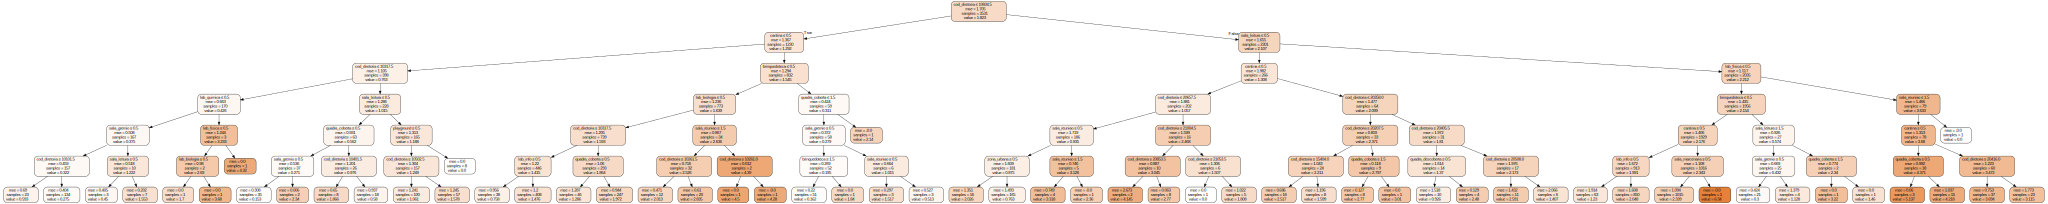

In [201]:
## Exibir a arvore
graph

<a id = 'head3_13'></a>
<h3>13. Comparando as estatísticas dos modelos</h3>

In [202]:
dct_model_comparition = {'Regressão Linear ': 
                                               {'Erro medio absoluto(MAE)': mae_lin_reg ,
                                                'Erro médio quadrático(MSE)': mse_lin_reg ,
                                                'Raiz do erro medio quadratico(RMSE)': rmse_lin_reg,
                                                'R-quadrado': r2_lin_reg },
                        
                         'Árvore de Decisão com Regressão': 
                                               {'Erro medio absoluto(MAE)': mae_dec_tree  ,
                                                'Erro médio quadrático(MSE)': mse_dec_tree  ,
                                                'Raiz do erro medio quadratico(RMSE)': rmse_dec_tree ,
                                                'R-quadrado': r2_dec_tree  }
                        }

## Dataframe com os dados
df_model_comparission = pd.DataFrame(dct_model_comparition).T

## Mostrar Dados
df_model_comparission

,Erro medio absoluto(MAE),Erro médio quadrático(MSE),Raiz do erro medio quadratico(RMSE),R-quadrado
Regressão Linear,0.934306,1.317091,1.147646,0.238691
Árvore de Decisão com Regressão,0.905990,1.393122,1.180306,0.194744
